In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/kaggle/input/market/marketing_campaign.csv", delimiter = '\t')


In [3]:
print ("Dataset Overview ")
print(f"Dataset Shape : {df.shape}")
print(f"Total records : {df.shape[0]}")
print(f"Total features : {df.shape[1]}")




Dataset Overview 
Dataset Shape : (2240, 29)
Total records : 2240
Total features : 29


In [4]:
print("Column Names and Data Types")
print(df.dtypes)
print("\n")

Column Names and Data Types
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object




In [5]:
print("First Few Rows")
print(df.head(5))

First Few Rows
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \


In [6]:
print("Basic Dataset Summary")
print(df.describe())

Basic Dataset Summary
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0

In [7]:
print("Categorical Values Summary")
categorical_cols = ['Education', 'Marital_Status']

for col in categorical_cols : 
    print(f"\n{col}")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")
print("\n")

Categorical Values Summary

Education
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Unique values: 5

Marital_Status
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Unique values: 8




In [8]:
print("Target Variable Distribution")
print("Response variable distribution:")
print(df['Response'].value_counts())
print(f"Response rate: {(df['Response'].mean() * 100):.2f}%")


Target Variable Distribution
Response variable distribution:
Response
0    1906
1     334
Name: count, dtype: int64
Response rate: 14.91%


In [9]:
print("Null Value Analysis")
null_summary = df.isnull().sum()
null_percentage = (df.isnull().sum()/len(df)) * 100

null_info = pd.DataFrame ({
    'Null Count' : null_summary,
    'Null Percentage' : null_percentage
})

print(null_info[null_info['Null Count']> 0 ])


Null Value Analysis
        Null Count  Null Percentage
Income          24         1.071429


In [10]:
print("Null Values Removal")
df_clean = df.dropna()
print("\n")

print (" After Null Values Removal")
print(f"Dataset Shape : {df_clean.shape}")
print(f"Total Cleaned Records : {df_clean.shape[0]}")
print(f"Total Cleaned Features : {df_clean.shape[1]}")
print(f"Records removed : {df.shape[0]- df_clean.shape[0]}")
print("\n")

print( " Verification ")
print(f"No Null Values Remaining ? : {df_clean.isnull().sum().sum()==0}")
print(f"Percentage of data remained : {(df_clean.shape[0]/df.shape[0])*100:.2f}%")



Null Values Removal


 After Null Values Removal
Dataset Shape : (2216, 29)
Total Cleaned Records : 2216
Total Cleaned Features : 29
Records removed : 24


 Verification 
No Null Values Remaining ? : True
Percentage of data remained : 98.93%


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vintage-inspired color palette
vintage_palette = [
    '#8B7355',  # Warm bronze (primary)
    '#6B8E23',  # Olive green (secondary) 
    '#CD5C5C',  # Terra cotta (accent)
    '#4682B4',  # Steel blue (accent)
    '#D2B48C',  # Tan (neutral)
    '#696969',  # Dim gray (text/dark)
    '#F5F5DC',  # Beige (background)
    '#8FBC8F',  # Sage green (accent)
    '#B8860B',  # Dark goldenrod (accent)
    '#778899'   # Light slate gray (neutral)
]

# Extended palette with variations for different plot types
vintage_palette_extended = {
    'primary': '#8B7355',      # Warm bronze
    'secondary': '#6B8E23',    # Olive green
    'accent1': '#CD5C5C',      # Terra cotta
    'accent2': '#4682B4',      # Steel blue
    'accent3': '#D2B48C',      # Tan
    'accent4': '#8FBC8F',      # Sage green
    'accent5': '#B8860B',      # Dark goldenrod
    'dark': '#696969',         # Dim gray
    'light': '#F5F5DC',        # Beige
    'neutral': '#778899',      # Light slate gray
    'success': '#6B8E23',      # Olive green
    'warning': '#B8860B',      # Dark goldenrod
    'alert': '#CD5C5C'         # Terra cotta
}

# Set the vintage palette as default
def set_vintage_theme():
    """Set up the complete vintage theme for all visualizations"""
    
    # Set color palette
    sns.set_palette(vintage_palette)
    
    # Set plotting style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Customize rcParams for vintage aesthetic
    plt.rcParams.update({
        'figure.facecolor': '#FDF5E6',  # Old lace background
        'axes.facecolor': '#FAF0E6',    # Linen axes background
        'grid.color': '#D2B48C',        # Tan grid lines
        'grid.alpha': 0.3,
        'text.color': '#696969',        # Dim gray text
        'axes.labelcolor': '#696969',
        'xtick.color': '#696969',
        'ytick.color': '#696969',
        'axes.edgecolor': '#8B7355',    # Bronze edges
        'axes.linewidth': 1.2,
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'Georgia', 'Palatino']
    })
    

    return vintage_palette_extended

# Function to apply vintage colors to specific plots
def get_vintage_colors(n_colors=5, color_type='main'):
    """Get vintage colors for specific plotting needs"""
    
    if color_type == 'main':
        return vintage_palette[:n_colors]
    elif color_type == 'warm':
        return ['#8B7355', '#CD5C5C', '#D2B48C', '#B8860B', '#8B4513'][:n_colors]
    elif color_type == 'cool':
        return ['#4682B4', '#6B8E23', '#8FBC8F', '#778899', '#2F4F4F'][:n_colors]
    elif color_type == 'sequential':
        return ['#F5F5DC', '#D2B48C', '#8B7355', '#696969', '#2F2F2F'][:n_colors]
    else:
        return vintage_palette[:n_colors]

 OUTLIER DETECTION AND REMOVAL ANALYSIS

 OUTLIER ANALYSIS BY VARIABLE:
----------------------------------------

Income              :
  Outliers found    :    8 (  0.4%)
  Normal range      : $   -14,526 - $   118,350
  Actual range      : $     1,730 - $   666,666

Total Spending      :
  Outliers found    :    3 (  0.1%)
  Normal range      :    -1399.5 -     2516.5
  Actual range      :        5.0 -     2525.0

Age                 :
  Outliers found    :    3 (  0.1%)
  Normal range      :       21.0 -       93.0
  Actual range      :       29.0 -      132.0

Recency             :
  Outliers found    :    0 (  0.0%)
  Normal range      :      -51.0 -      149.0
  Actual range      :        0.0 -       99.0

MntWines            :
  Outliers found    :   35 (  1.6%)
  Normal range      :     -697.5 -     1226.5
  Actual range      :        0.0 -     1493.0

MntMeatProducts     :
  Outliers found    :  174 (  7.9%)
  Normal range      :     -308.4 -      556.6
  Actual range      :  

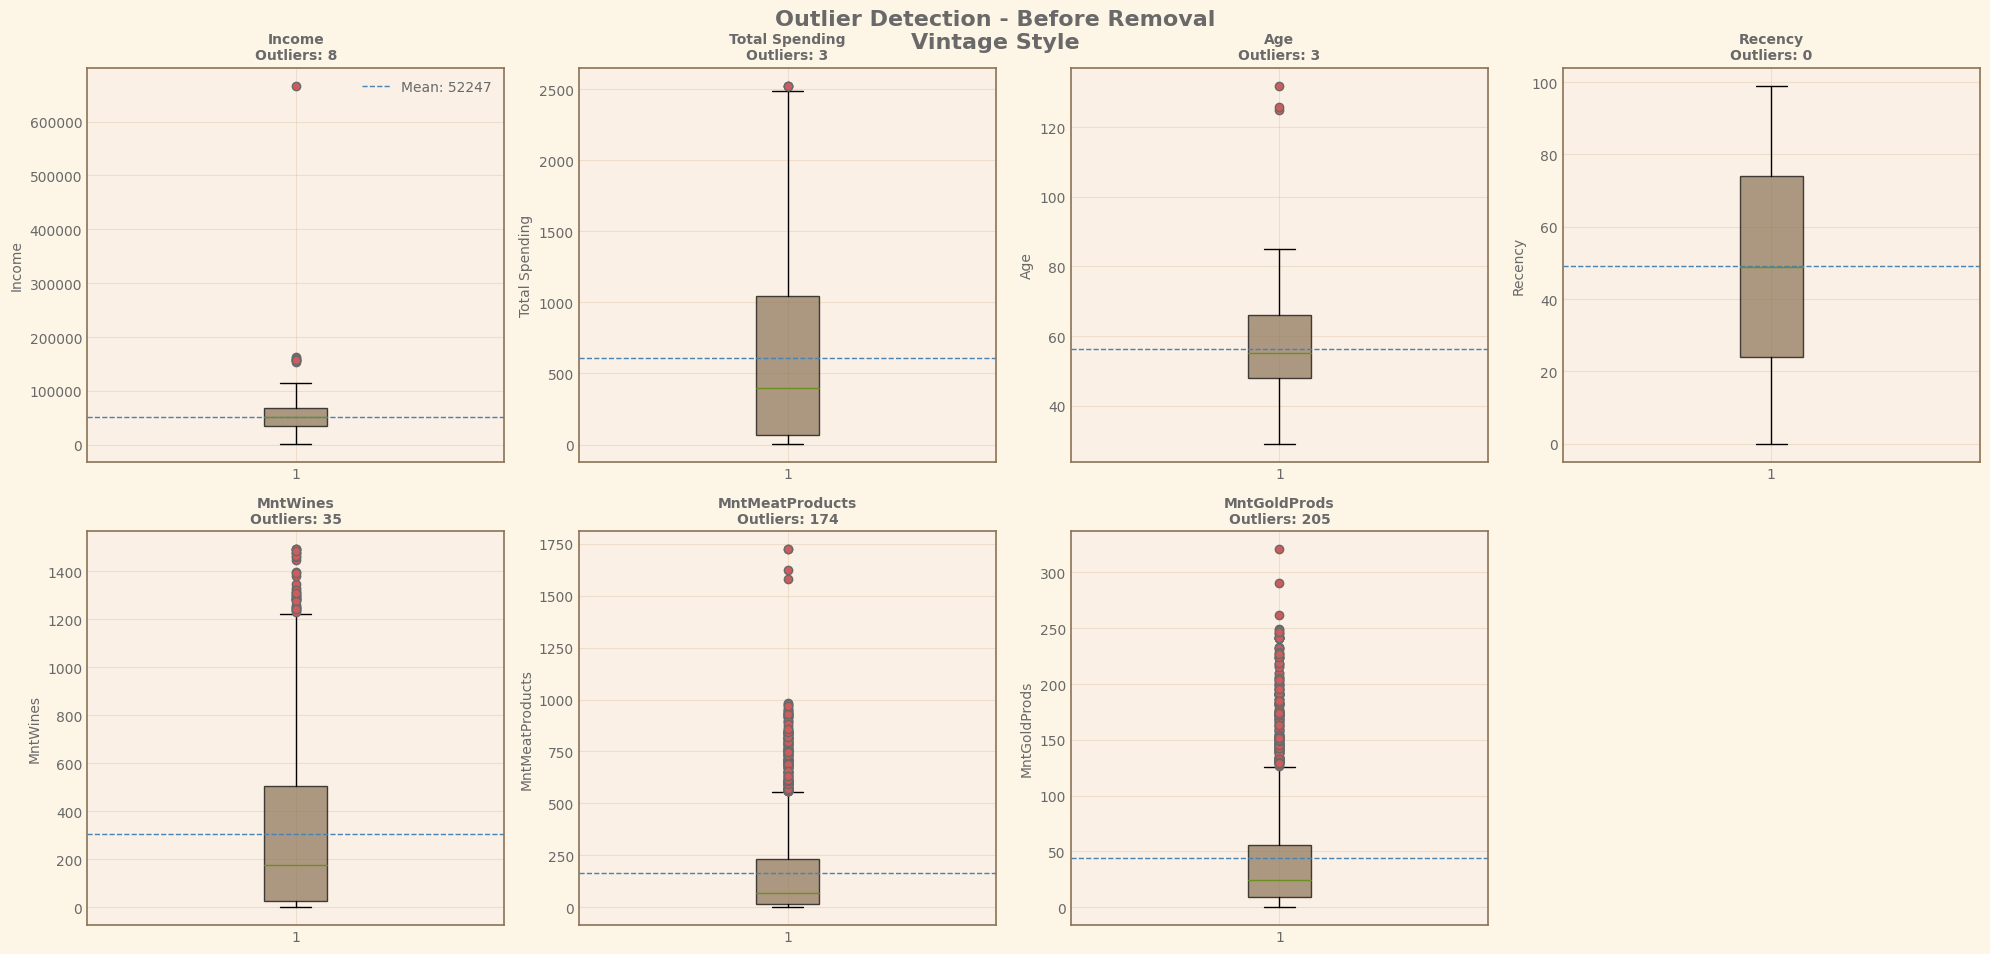


  OUTLIER REMOVAL PROCESS:
----------------------------------------
Total unique customers with outliers: 375
Percentage of dataset with outliers: 16.92%

Dataset size before outlier removal: 2,216
Dataset size after outlier removal: 1,841
Records removed: 375
Data retained: 83.08%

📈 COMPARISON: BEFORE vs AFTER OUTLIER REMOVAL

Income:
  Metric             Before        After       Change
  ------------ ------------ ------------ ------------
  Mean         $     52,247 $     47,417        -9.2%
  Std Dev      $     25,173 $     19,081       -24.2%

Total Spending:
  Metric             Before        After       Change
  ------------ ------------ ------------ ------------
  Mean         $        607 $        441       -27.4%
  Std Dev      $        603 $        470       -22.0%

Age:
  Metric             Before        After       Change
  ------------ ------------ ------------ ------------
  Mean         $         56 $         56        -0.5%
  Std Dev      $         12 $         11   

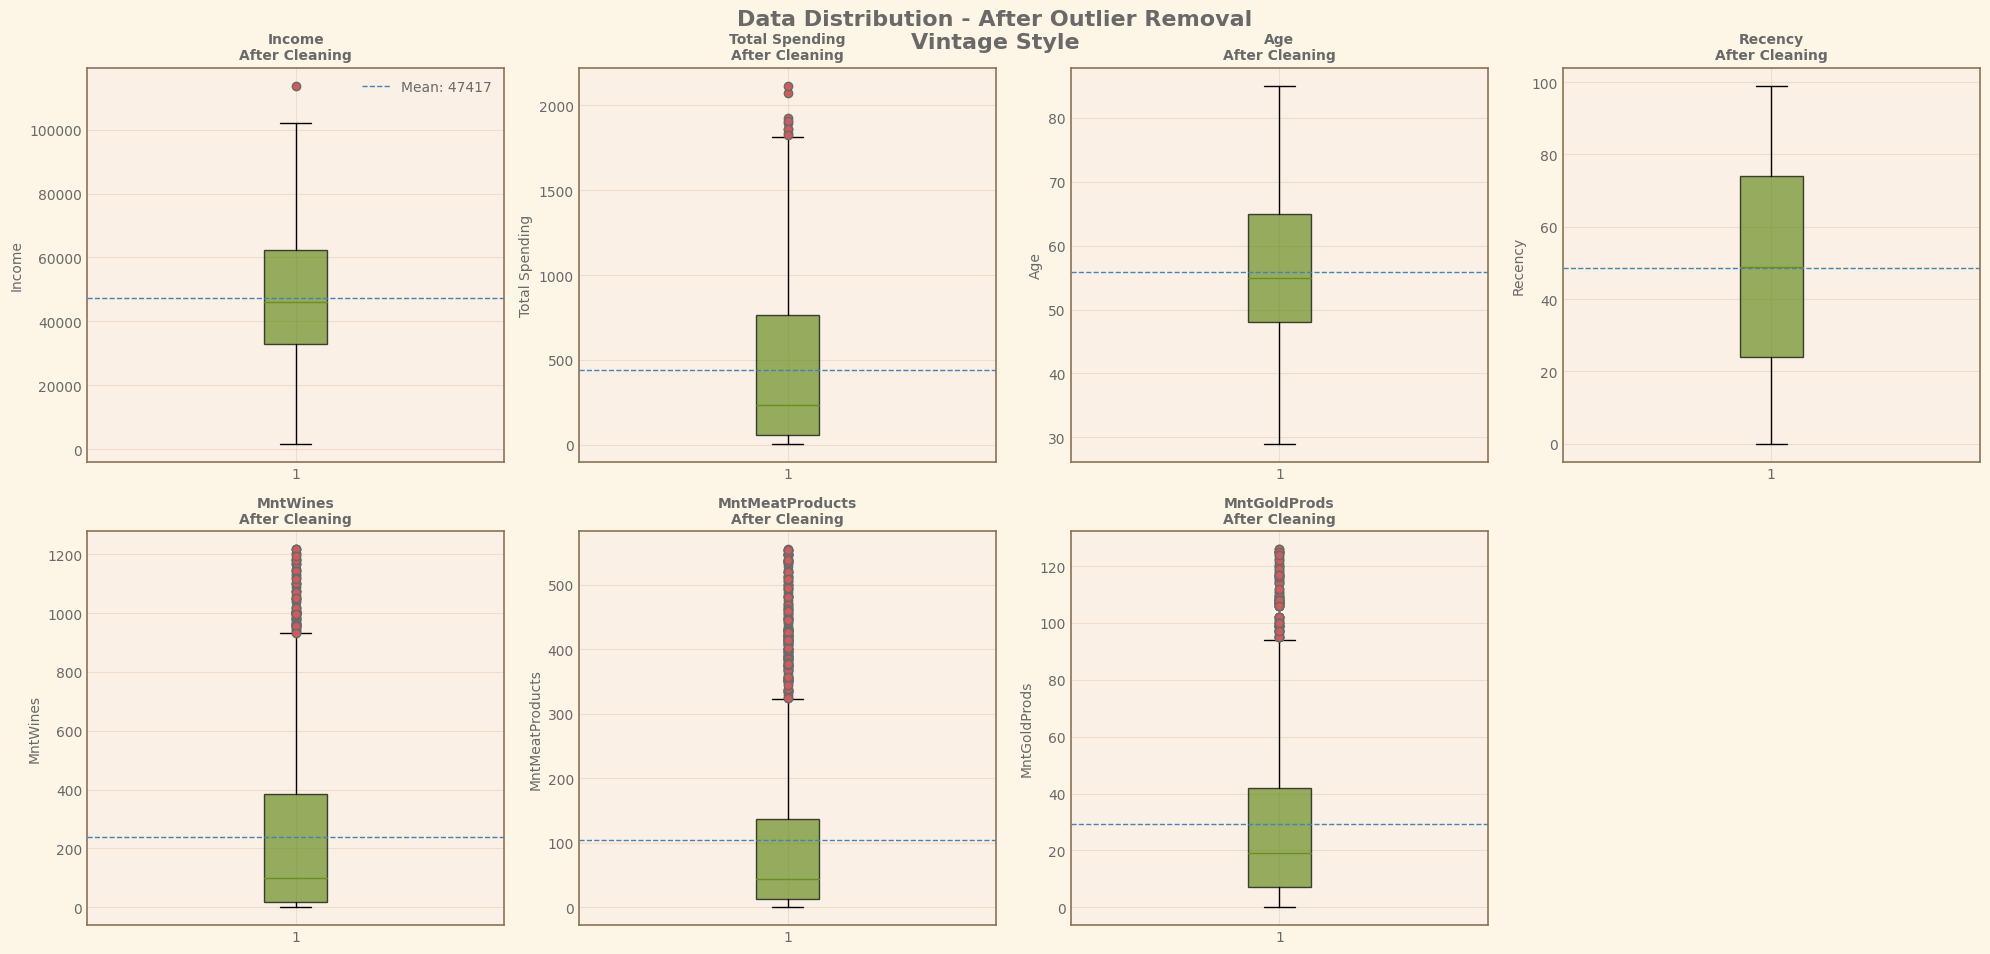


🎯 OUTLIER REMOVAL COMPLETE!
Dataset 'df_clean' now contains 1,841 records without outliers


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set vintage theme
vintage_colors = set_vintage_theme()


# Make a copy of the original cleaned data before outlier removal
df_before_outliers = df_clean.copy()
current_year = 2025
df_clean['Age'] = current_year - df_clean['Year_Birth']


df_clean['Total Spending'] = (df_clean['MntWines'] + 
                              df_clean['MntFruits'] + 
                              df_clean['MntMeatProducts']+
                              df_clean['MntFishProducts'] + 
                              df_clean['MntSweetProducts'] + 
                              df_clean['MntGoldProds'])

print(" OUTLIER DETECTION AND REMOVAL ANALYSIS")
print("=" * 50)

# Key numerical variables to check for outliers
numerical_vars = ['Income', 'Total Spending', 'Age', 'Recency', 
                  'MntWines', 'MntMeatProducts', 'MntGoldProds']

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for each variable
outliers_summary = {}
total_outliers_indices = set()

print("\n OUTLIER ANALYSIS BY VARIABLE:")
print("-" * 40)

for var in numerical_vars:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, var)
    outliers_summary[var] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df_clean)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'min_value': df_clean[var].min(),
        'max_value': df_clean[var].max(),
        'outlier_indices': set(outliers.index)
    }
    
    total_outliers_indices.update(outliers.index)
    
    print(f"\n{var:20}:")
    print(f"  Outliers found    : {len(outliers):>4} ({outliers_summary[var]['percentage']:5.1f}%)")
    print(f"  Normal range      : ${lower_bound:>10,.0f} - ${upper_bound:>10,.0f}" if var in ['Income', 'Total_Spending'] else f"  Normal range      : {lower_bound:>10.1f} - {upper_bound:>10.1f}")
    print(f"  Actual range      : ${df_clean[var].min():>10,.0f} - ${df_clean[var].max():>10,.0f}" if var in ['Income', 'Total_Spending'] else f"  Actual range      : {df_clean[var].min():>10.1f} - {df_clean[var].max():>10.1f}")

# Create visualization of outliers before removal
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    if i < len(axes):
        # Boxplot to show outliers
        box = axes[i].boxplot(df_clean[var], patch_artist=True, 
                             boxprops=dict(facecolor=vintage_colors['primary'], alpha=0.7),
                             flierprops=dict(marker='o', markerfacecolor=vintage_colors['alert'], 
                                           markersize=6, markeredgecolor=vintage_colors['dark']))
        
        axes[i].set_title(f'{var}\nOutliers: {outliers_summary[var]["count"]}', 
                         fontweight='bold', fontsize=10)
        axes[i].set_ylabel(var)
        
        # Add mean line
        mean_val = df_clean[var].mean()
        axes[i].axhline(mean_val, color=vintage_colors['accent2'], linestyle='--', 
                       linewidth=1, label=f'Mean: {mean_val:.0f}')
        
        if i == 0:
            axes[i].legend()

# Remove empty subplots
for i in range(len(numerical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Outlier Detection - Before Removal\nVintage Style', 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# Remove outliers
print(f"\n  OUTLIER REMOVAL PROCESS:")
print("-" * 40)

# Get unique indices of all outliers across all variables
all_outlier_indices = list(total_outliers_indices)
print(f"Total unique customers with outliers: {len(all_outlier_indices)}")
print(f"Percentage of dataset with outliers: {(len(all_outlier_indices) / len(df_clean)) * 100:.2f}%")

# Create cleaned dataset without outliers
df_clean_no_outliers = df_clean.drop(all_outlier_indices)

print(f"\nDataset size before outlier removal: {len(df_clean):,}")
print(f"Dataset size after outlier removal: {len(df_clean_no_outliers):,}")
print(f"Records removed: {len(df_clean) - len(df_clean_no_outliers):,}")
print(f"Data retained: {(len(df_clean_no_outliers) / len(df_clean)) * 100:.2f}%")

# Compare key statistics before and after outlier removal
print(f"\n📈 COMPARISON: BEFORE vs AFTER OUTLIER REMOVAL")
print("=" * 50)

comparison_vars = ['Income', 'Total Spending', 'Age']
for var in comparison_vars:
    print(f"\n{var}:")
    print(f"  {'Metric':<12} {'Before':>12} {'After':>12} {'Change':>12}")
    print(f"  {'-'*12} {'-'*12} {'-'*12} {'-'*12}")
    
    before_mean = df_clean[var].mean()
    after_mean = df_clean_no_outliers[var].mean()
    change_mean = ((after_mean - before_mean) / before_mean) * 100
    
    before_std = df_clean[var].std()
    after_std = df_clean_no_outliers[var].std()
    change_std = ((after_std - before_std) / before_std) * 100
    
    print(f"  {'Mean':<12} ${before_mean:>11,.0f} ${after_mean:>11,.0f} {change_mean:>11.1f}%")
    print(f"  {'Std Dev':<12} ${before_std:>11,.0f} ${after_std:>11,.0f} {change_std:>11.1f}%")

# Update df_clean to the version without outliers
df_clean = df_clean_no_outliers.copy()

print(f"\n FINAL DATASET STATUS:")
print(f"• Cleaned dataset shape: {df_clean.shape}")
print(f"• Total customers: {len(df_clean):,}")
print(f"• Features: {df_clean.shape[1]}")
print(f"• No null values: {df_clean.isnull().sum().sum() == 0}")
print(f"• Outliers removed: {len(all_outlier_indices):,}")

# Show distribution after outlier removal
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    if i < len(axes):
        # Boxplot after outlier removal
        box = axes[i].boxplot(df_clean[var], patch_artist=True, 
                             boxprops=dict(facecolor=vintage_colors['secondary'], alpha=0.7),
                             flierprops=dict(marker='o', markerfacecolor=vintage_colors['accent1'], 
                                           markersize=6, markeredgecolor=vintage_colors['dark']))
        
        axes[i].set_title(f'{var}\nAfter Cleaning', 
                         fontweight='bold', fontsize=10)
        axes[i].set_ylabel(var)
        
        # Add mean line
        mean_val = df_clean[var].mean()
        axes[i].axhline(mean_val, color=vintage_colors['accent2'], linestyle='--', 
                       linewidth=1, label=f'Mean: {mean_val:.0f}')
        
        if i == 0:
            axes[i].legend()

# Remove empty subplots
for i in range(len(numerical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Data Distribution - After Outlier Removal\nVintage Style', 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

print(f"\n🎯 OUTLIER REMOVAL COMPLETE!")
print(f"Dataset 'df_clean' now contains {len(df_clean):,} records without outliers")

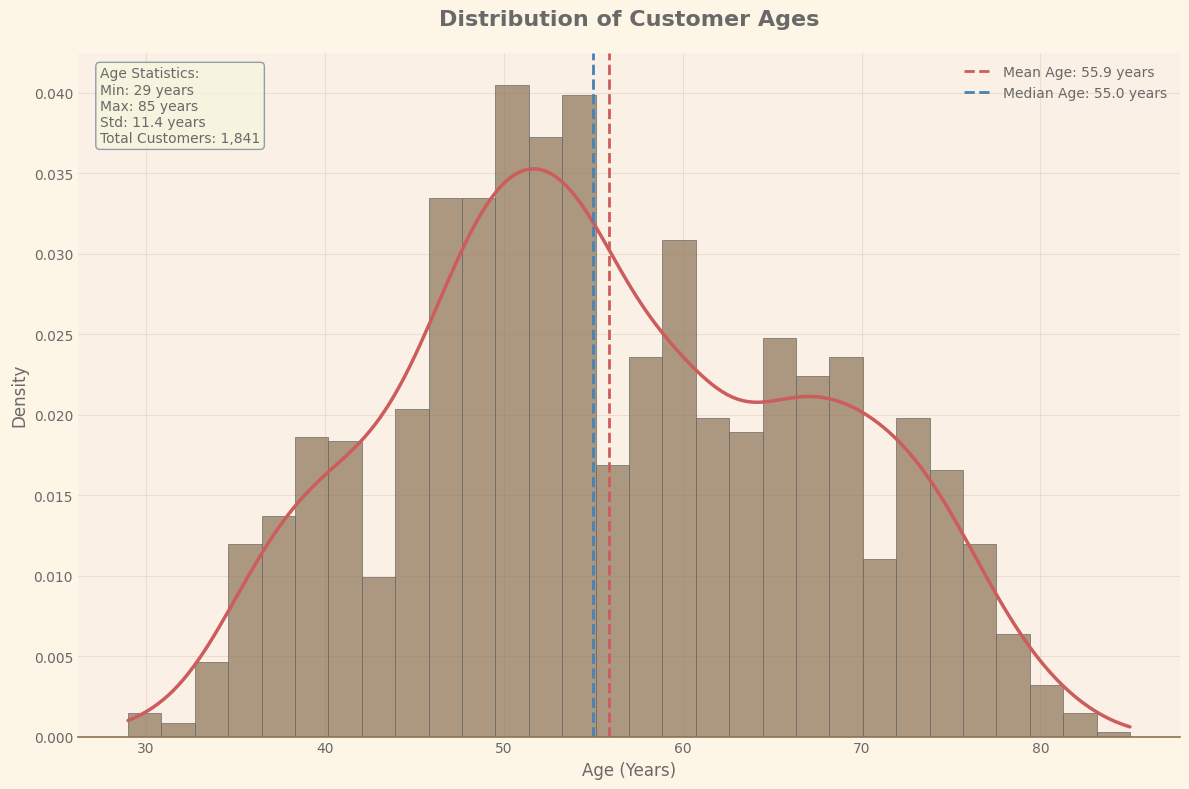


 DETAILED AGE STATISTICS:
Mean Age: 55.89 years
Median Age: 55.00 years
Standard Deviation: 11.44 years
Age Range: 29 - 85 years
Interquartile Range (IQR): 17.00 years

 AGE PERCENTILES:
25th percentile: 48.0 years
50th percentile: 55.0 years
75th percentile: 65.0 years
90th percentile: 72.0 years
95th percentile: 75.0 years

  Potential outliers (using IQR method): 0 customers
   Age range for outliers: nan - nan years


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

current_year = 2025
df_clean['Age'] = current_year - df_clean['Year_Birth']


vintage_colors = set_vintage_theme()

plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df_clean, x='Age', 
                  bins=30, 
                  kde=True, 
                  color=vintage_colors['primary'],
                  alpha=0.7,
                  edgecolor=vintage_colors['dark'],
                  linewidth=0.5,
                  stat='density')

ax.lines[0].set_color(vintage_colors['accent1'])
ax.lines[0].set_linewidth(2.5)

mean_age = df_clean['Age'].mean()
plt.axvline(mean_age, color=vintage_colors['alert'], linestyle='--', linewidth=2, 
            label=f'Mean Age: {mean_age:.1f} years')

median_age = df_clean['Age'].median()
plt.axvline(median_age, color=vintage_colors['accent2'], linestyle='--', linewidth=2,
            label=f'Median Age: {median_age:.1f} years')

plt.title('Distribution of Customer Ages', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

# Add some statistics as text
min_age = df_clean['Age'].min()
max_age = df_clean['Age'].max()
std_age = df_clean['Age'].std()

stats_text = f'Age Statistics:\nMin: {min_age:.0f} years\nMax: {max_age:.0f} years\nStd: {std_age:.1f} years\nTotal Customers: {len(df_clean):,}'
plt.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor=vintage_colors['light'], 
                   edgecolor=vintage_colors['neutral'], alpha=0.8),
         verticalalignment='top', fontsize=10)

# Customize grid and spines
plt.grid(True, alpha=0.3)
sns.despine(left=True)

plt.tight_layout()
plt.show()

print("\n DETAILED AGE STATISTICS:")
print(f"Mean Age: {mean_age:.2f} years")
print(f"Median Age: {median_age:.2f} years")
print(f"Standard Deviation: {std_age:.2f} years")
print(f"Age Range: {min_age} - {max_age} years")
print(f"Interquartile Range (IQR): {df_clean['Age'].quantile(0.75) - df_clean['Age'].quantile(0.25):.2f} years")

# Age distribution percentiles
print("\n AGE PERCENTILES:")
percentiles = [25, 50, 75, 90, 95]
for p in percentiles:
    print(f"{p}th percentile: {df_clean['Age'].quantile(p/100):.1f} years")

Q1 = df_clean['Age'].quantile(0.25)
Q3 = df_clean['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['Age'] < lower_bound) | (df_clean['Age'] > upper_bound)]
print(f"\n  Potential outliers (using IQR method): {len(outliers)} customers")
print(f"   Age range for outliers: {outliers['Age'].min()} - {outliers['Age'].max()} years")

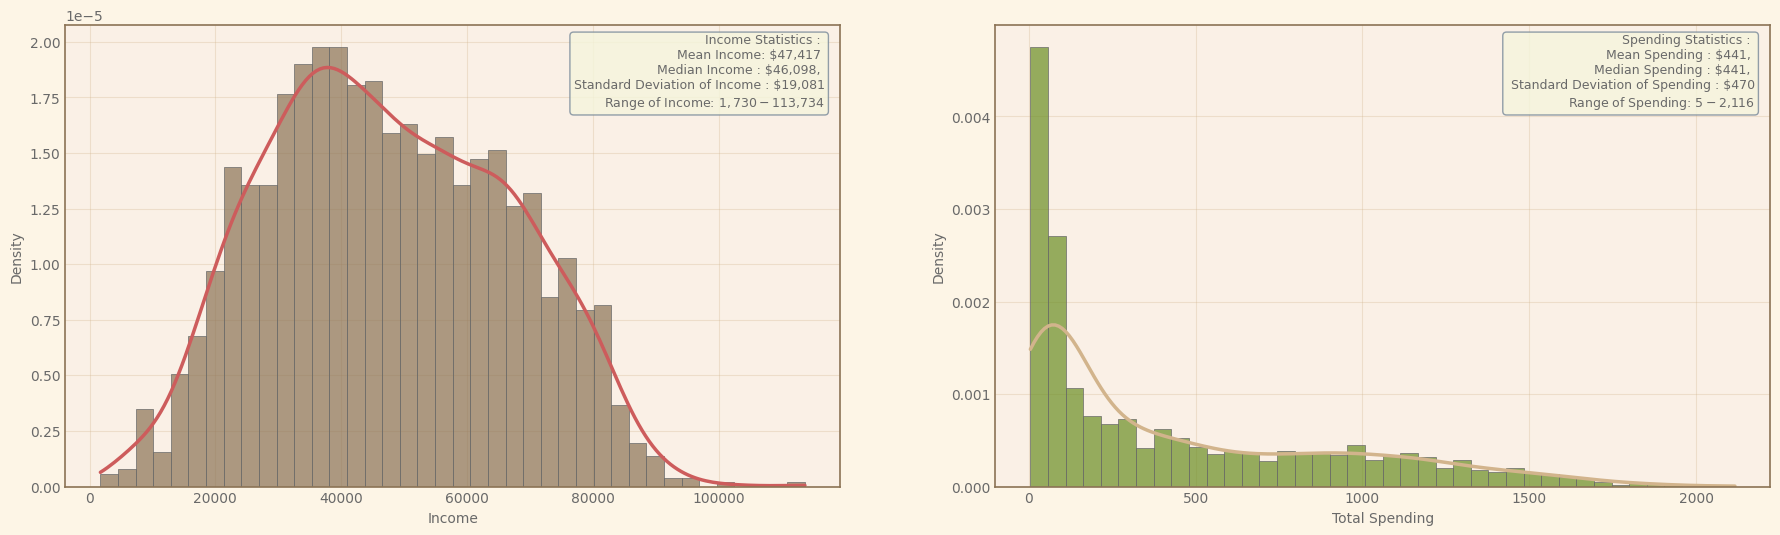

Spending Statistics : 
 Mean Spending : $441, 
 Median Spending : $441, 
 Standard Deviation of Spending : $470
Range of Spending: $5 - $2,116


Income Statistics : 
 Mean Income: $47,417 
 Median Income : $46,098, 
Standard Deviation of Income : $19,081
Range of Income: $1,730 - $113,734


In [18]:
vintage_colors = set_vintage_theme()

df_clean['Total Spending'] = (df_clean['MntWines'] + 
                              df_clean['MntFruits'] + 
                              df_clean['MntMeatProducts']+
                              df_clean['MntFishProducts'] + 
                              df_clean['MntSweetProducts'] + 
                              df_clean['MntGoldProds'])

fig , (ax1,ax2) = plt.subplots(1,2, figsize = (22,6))

# Income Distribution 
sns.histplot(
    data = df_clean,
    x = 'Income', 
    bins = 40,
    kde = True,
    color = vintage_colors['primary'],
    alpha = 0.7,
    linewidth = 0.5,
    edgecolors = vintage_colors['dark'],
    stat = 'density',
    ax = ax1
)

ax1.lines[0].set_color(vintage_colors['accent1'])
ax1.lines[0].set_linewidth(2.5)

mean_income = df_clean['Income'].mean()
median_income = df_clean['Income'].median()

income_stats = f'Income Statistics : \n Mean Income: ${mean_income :,.0f} \n Median Income : ${median_income :,.0f}, \nStandard Deviation of Income : ${df_clean["Income"].std():,.0f}\nRange of Income: ${df_clean["Income"].min():,.0f} - ${df_clean["Income"].max():,.0f}'
ax1.text(0.98, 0.98, income_stats, transform=ax1.transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor=vintage_colors['light'], 
                   edgecolor=vintage_colors['neutral'], alpha=0.8),
         verticalalignment='top', horizontalalignment = 'right', fontsize=9)



# Total Spending Distribution 

sns.histplot(
    data = df_clean,
    x = 'Total Spending',
    bins = 40,
    kde = True, 
    color = vintage_colors['secondary'],
    alpha = 0.7,
    linewidth = 0.5,
    edgecolors = vintage_colors['dark'],
    stat = 'density',
    ax = ax2
)

ax2.lines[0].set_color(vintage_colors['accent3'])
ax2.lines[0].set_linewidth(2.5)

mean_spending = df_clean['Total Spending'].mean()
median_spending = df_clean['Total Spending'].mean()

spending_stats = f'Spending Statistics : \n Mean Spending : ${mean_spending :,.0f}, \n Median Spending : ${median_spending :,.0f}, \n Standard Deviation of Spending : ${df_clean["Total Spending"].std():,.0f}\nRange of Spending: ${df_clean["Total Spending"].min():,.0f} - ${df_clean["Total Spending"].max():,.0f}'
ax2.text(0.98, 0.98, spending_stats, transform=ax2.transAxes, 
         bbox = dict(boxstyle = "round,pad=0.3", facecolor = vintage_colors['light'],
                    edgecolor = vintage_colors['neutral'], alpha=0.8),
         verticalalignment = 'top', horizontalalignment = 'right', fontsize = 9)
         

plt.show()

print(spending_stats)
print("\n")

print(income_stats)

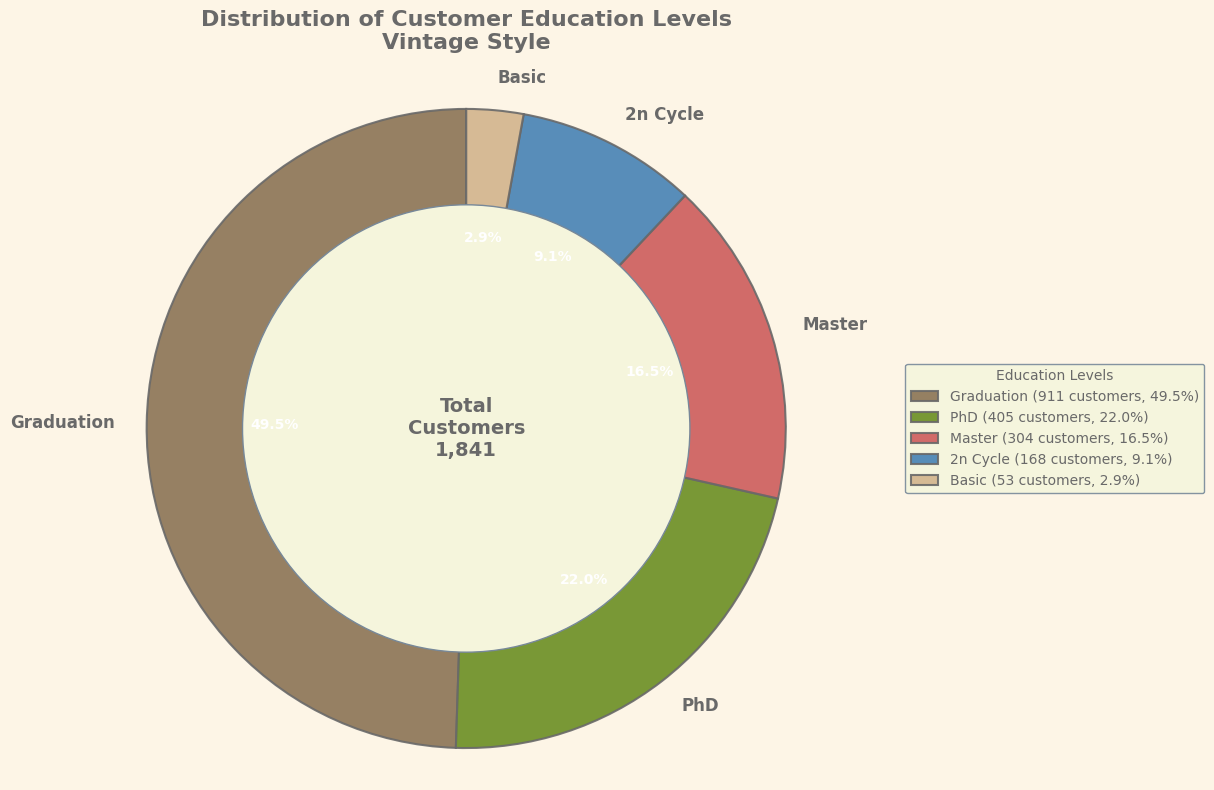


 DETAILED EDUCATION DISTRIBUTION:
Graduation     :  911 customers ( 49.5%)
PhD            :  405 customers ( 22.0%)
Master         :  304 customers ( 16.5%)
2n Cycle       :  168 customers (  9.1%)
Basic          :   53 customers (  2.9%)

 SUMMARY:
Total Customers: 1,841
Most Common Education: Graduation (911 customers)
Least Common Education: Basic (53 customers)

 INSIGHTS:
• Graduation represents 49.5% of all customers
• Top 2 education levels account for 71.5% of customers
• Educational diversity: 5 different education levels

 EDUCATION VS INCOME:
  PhD            : $51,930
  Master         : $48,687
  Graduation     : $47,274
  2n Cycle       : $43,604
  Basic          : $20,180


In [19]:
vintage_colors = set_vintage_theme()

education_counts = df_clean['Education'].value_counts()
education_percentages = (education_counts / len(df_clean)) * 100

plt.figure(figsize=(12, 8))

colors = [vintage_colors['primary'], vintage_colors['secondary'], 
          vintage_colors['accent1'], vintage_colors['accent2'], 
          vintage_colors['accent3']]

wedges, texts, autotexts = plt.pie(education_counts.values, 
                                   labels=education_counts.index,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   textprops={'fontsize': 11, 'color': vintage_colors['dark']},
                                   wedgeprops={'edgecolor': vintage_colors['dark'], 
                                              'linewidth': 1.5,
                                              'alpha': 0.9})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_color(vintage_colors['dark'])

plt.title('Distribution of Customer Education Levels\nVintage Style', 
          fontsize=16, fontweight='bold', pad=20, color=vintage_colors['dark'])

legend_labels = [f'{edu} ({count:,} customers, {percent:.1f}%)' 
                for edu, count, percent in zip(education_counts.index, 
                                             education_counts.values, 
                                             education_percentages)]

plt.legend(wedges, legend_labels,
          title="Education Levels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          frameon=True,
          framealpha=0.9,
          edgecolor=vintage_colors['neutral'],
          facecolor=vintage_colors['light'])

centre_circle = plt.Circle((0,0), 0.70, fc=vintage_colors['light'], 
                          edgecolor=vintage_colors['neutral'], linewidth=1)
plt.gca().add_artist(centre_circle)

plt.axis('equal')

total_customers = len(df_clean)
plt.text(0, 0, f'Total\nCustomers\n{total_customers:,}', 
         ha='center', va='center', fontsize=14, fontweight='bold',
         color=vintage_colors['dark'])

plt.tight_layout()
plt.show()

# Print detailed education statistics
print("\n DETAILED EDUCATION DISTRIBUTION:")
print("=" * 50)
for education, count in education_counts.items():
    percentage = (count / total_customers) * 100
    print(f"{education:15}: {count:4} customers ({percentage:5.1f}%)")

print(f"\n SUMMARY:")
print(f"Total Customers: {total_customers:,}")
print(f"Most Common Education: {education_counts.index[0]} ({education_counts.iloc[0]:,} customers)")
print(f"Least Common Education: {education_counts.index[-1]} ({education_counts.iloc[-1]:,} customers)")

print(f"\n INSIGHTS:")
print(f"• {education_counts.index[0]} represents {education_percentages.iloc[0]:.1f}% of all customers")
print(f"• Top 2 education levels account for {(education_percentages.iloc[0] + education_percentages.iloc[1]):.1f}% of customers")
print(f"• Educational diversity: {len(education_counts)} different education levels")

print(f"\n EDUCATION VS INCOME:")
education_income = df_clean.groupby('Education')['Income'].mean().sort_values(ascending=False)
for education, avg_income in education_income.items():
    print(f"  {education:15}: ${avg_income:,.0f}")

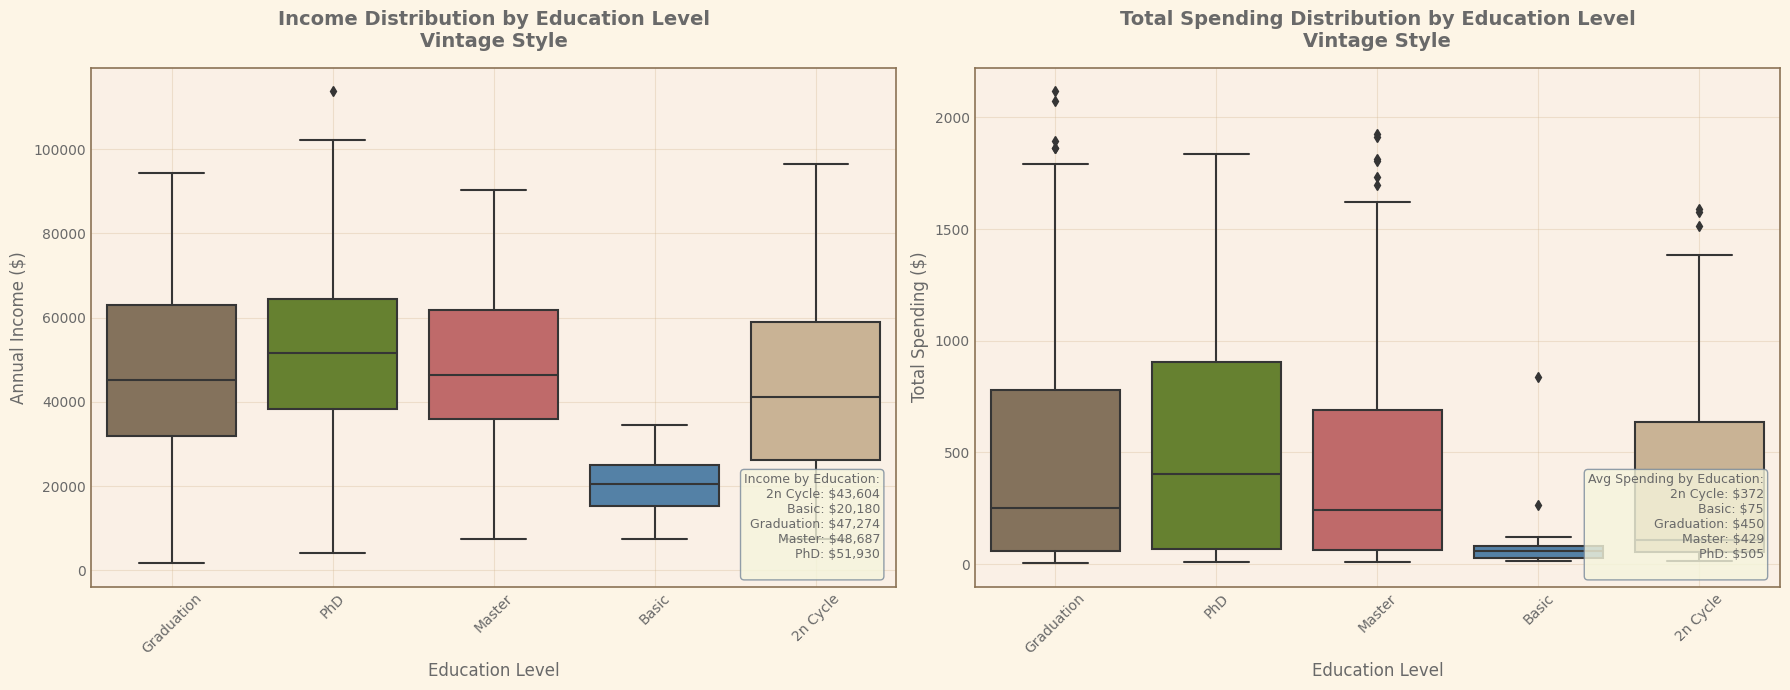


 DETAILED INCOME ANALYSIS BY EDUCATION:

PhD:
  Count     : 405.0 customers
  Mean      : $    51,930
  Median    : $    51,518
  Std Dev   : $    17,086

Master:
  Count     : 304.0 customers
  Mean      : $    48,687
  Median    : $    46,423
  Std Dev   : $    17,404

Graduation:
  Count     : 911.0 customers
  Mean      : $    47,274
  Median    : $    45,146
  Std Dev   : $    19,107

2n Cycle:
  Count     : 168.0 customers
  Mean      : $    43,604
  Median    : $    41,256
  Std Dev   : $    21,252

Basic:
  Count     : 53.0 customers
  Mean      : $    20,180
  Median    : $    20,425
  Std Dev   : $     6,225

 DETAILED SPENDING ANALYSIS BY EDUCATION:

PhD:
  Count     : 405.0 customers
  Mean      : $       505
  Median    : $       401
  Std Dev   : $       478

Graduation:
  Count     : 911.0 customers
  Mean      : $       450
  Median    : $       251
  Std Dev   : $       478

Master:
  Count     : 304.0 customers
  Mean      : $       429
  Median    : $       240
  St

In [20]:

vintage_colors = set_vintage_theme()

df_clean['Total_Spending'] = (df_clean['MntWines'] + df_clean['MntFruits'] + 
                             df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + 
                             df_clean['MntSweetProducts'] + df_clean['MntGoldProds'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

sns.boxplot(data=df_clean, x='Education', y='Income', 
            palette=[vintage_colors['primary'], vintage_colors['secondary'], 
                    vintage_colors['accent1'], vintage_colors['accent2'],
                    vintage_colors['accent3']],
            ax=ax1)

ax1.set_title('Income Distribution by Education Level\nVintage Style', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Education Level', fontsize=12)
ax1.set_ylabel('Annual Income ($)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

education_income_means = df_clean.groupby('Education')['Income'].mean()

income_stats_text = "Income by Education:\n"
for edu, mean_income in education_income_means.items():
    income_stats_text += f"{edu}: ${mean_income:,.0f}\n"

ax1.text(0.98, 0.02, income_stats_text, transform=ax1.transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=vintage_colors['light'],
                   edgecolor=vintage_colors['neutral'], alpha=0.8),
         verticalalignment='bottom', horizontalalignment='right', fontsize=9)




sns.boxplot(data=df_clean, x='Education', y='Total_Spending', 
            palette=[vintage_colors['primary'], vintage_colors['secondary'], 
                    vintage_colors['accent1'], vintage_colors['accent2'],
                    vintage_colors['accent3']],
            ax=ax2)

ax2.set_title('Total Spending Distribution by Education Level\nVintage Style', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Education Level', fontsize=12)
ax2.set_ylabel('Total Spending ($)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

education_spending_means = df_clean.groupby('Education')['Total_Spending'].mean()

spending_stats_text = "Avg Spending by Education:\n"
for edu, mean_spending in education_spending_means.items():
    spending_stats_text += f"{edu}: ${mean_spending:,.0f}\n"

ax2.text(0.98, 0.02, spending_stats_text, transform=ax2.transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=vintage_colors['light'],
                   edgecolor=vintage_colors['neutral'], alpha=0.8),
         verticalalignment='bottom', horizontalalignment='right', fontsize=9)

ax1.legend(loc='upper left', framealpha=0.9)
ax2.legend(loc='upper left', framealpha=0.9)

plt.tight_layout()
plt.show()

print("\n DETAILED INCOME ANALYSIS BY EDUCATION:")
print("=" * 60)
education_income_stats = df_clean.groupby('Education')['Income'].agg(['mean', 'median', 'std', 'count'])
education_income_stats = education_income_stats.sort_values('mean', ascending=False)

for education, row in education_income_stats.iterrows():
    print(f"\n{education}:")
    print(f"  Count     : {row['count']:>4} customers")
    print(f"  Mean      : ${row['mean']:>10,.0f}")
    print(f"  Median    : ${row['median']:>10,.0f}")
    print(f"  Std Dev   : ${row['std']:>10,.0f}")

print("\n DETAILED SPENDING ANALYSIS BY EDUCATION:")
print("=" * 60)
education_spending_stats = df_clean.groupby('Education')['Total_Spending'].agg(['mean', 'median', 'std', 'count'])
education_spending_stats = education_spending_stats.sort_values('mean', ascending=False)

for education, row in education_spending_stats.iterrows():
    print(f"\n{education}:")
    print(f"  Count     : {row['count']:>4} customers")
    print(f"  Mean      : ${row['mean']:>10,.0f}")
    print(f"  Median    : ${row['median']:>10,.0f}")
    print(f"  Std Dev   : ${row['std']:>10,.0f}")

print(f"\n SPENDING-TO-INCOME RATIO BY EDUCATION:")
print("=" * 50)
df_clean['Spending_Income_Ratio'] = (df_clean['Total_Spending'] / df_clean['Income']) * 100
ratio_by_education = df_clean.groupby('Education')['Spending_Income_Ratio'].mean().sort_values(ascending=False)

for education, ratio in ratio_by_education.items():
    print(f"  {education:15}: {ratio:5.1f}% of income spent")

print(f"\n KEY INSIGHTS:")
highest_income_edu = education_income_stats.index[0]
lowest_income_edu = education_income_stats.index[-1]
income_difference = education_income_stats.loc[highest_income_edu, 'mean'] - education_income_stats.loc[lowest_income_edu, 'mean']

highest_spending_edu = education_spending_stats.index[0]
lowest_spending_edu = education_spending_stats.index[-1]
spending_difference = education_spending_stats.loc[highest_spending_edu, 'mean'] - education_spending_stats.loc[lowest_spending_edu, 'mean']

print(f"• Highest income group: {highest_income_edu} (${education_income_stats.loc[highest_income_edu, 'mean']:,.0f})")
print(f"• Lowest income group: {lowest_income_edu} (${education_income_stats.loc[lowest_income_edu, 'mean']:,.0f})")
print(f"• Income difference: ${income_difference:,.0f}")
print(f"• Highest spending group: {highest_spending_edu} (${education_spending_stats.loc[highest_spending_edu, 'mean']:,.0f})")
print(f"• Most efficient spenders: {ratio_by_education.index[0]} ({ratio_by_education.iloc[0]:.1f}% of income)")

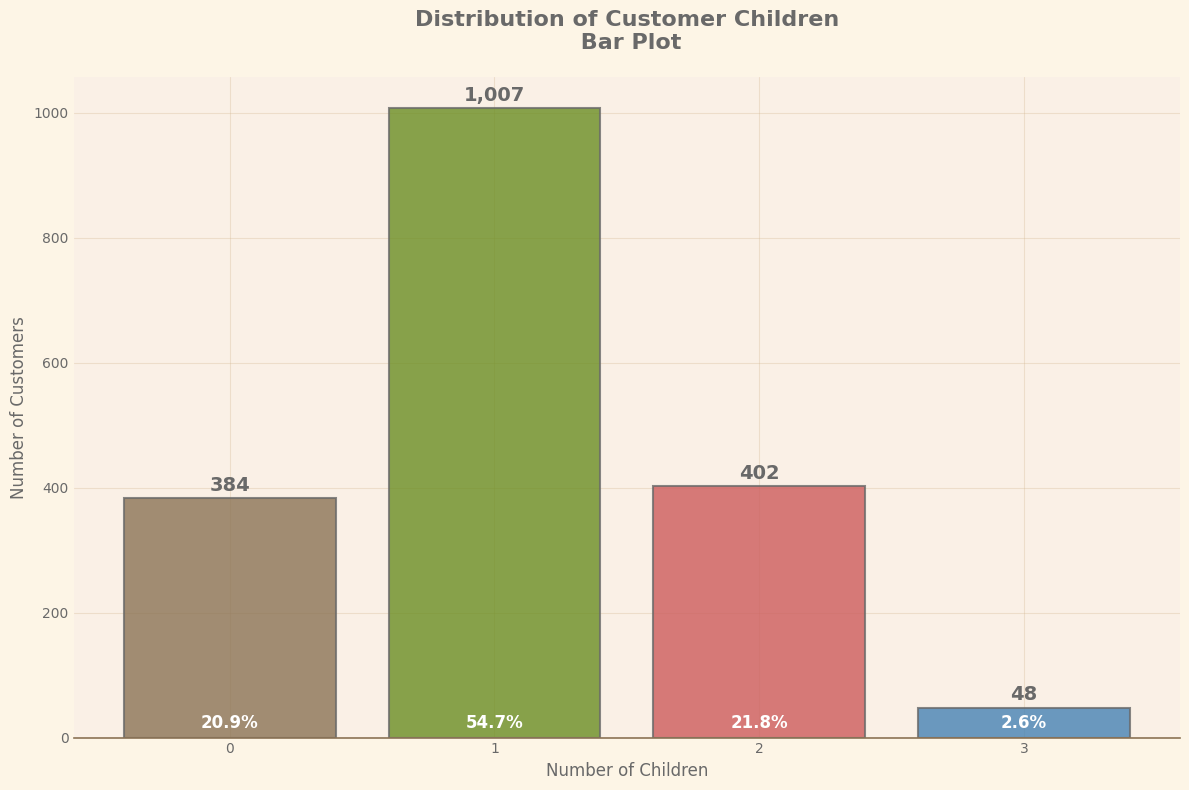


 CHILDREN DISTRIBUTION DETAILS:
0 Children:  384 customers ( 20.9%)
1 Children: 1007 customers ( 54.7%)
2 Children:  402 customers ( 21.8%)
3 Children:   48 customers (  2.6%)

 SUMMARY:
Total Customers: 1,841
Customers with children: 1,457
Percentage with children: 79.1%
Average children per customer: 1.06

 SPENDING PATTERNS BY CHILDREN COUNT:

0 Children:
  Customers    : 384.0
  Avg Income   : $    56,837
  Avg Spending : $       793
  Med Spending : $       902

1 Children:
  Customers    : 1007.0
  Avg Income   : $    45,325
  Avg Spending : $       404
  Med Spending : $       223

2 Children:
  Customers    : 402.0
  Avg Income   : $    43,952
  Avg Spending : $       225
  Med Spending : $        90

3 Children:
  Customers    : 48.0
  Avg Income   : $    44,941
  Avg Spending : $       203
  Med Spending : $        74


In [21]:

vintage_colors = set_vintage_theme()

# Create children count feature
df_clean['Children_Count'] = df_clean['Kidhome'] + df_clean['Teenhome']
children_distribution = df_clean['Children_Count'].value_counts().sort_index()

plt.figure(figsize=(12, 8))

bars = plt.bar(children_distribution.index, children_distribution.values,
               color=[vintage_colors['primary'], vintage_colors['secondary'], 
                      vintage_colors['accent1'], vintage_colors['accent2']],
               alpha=0.8,
               edgecolor=vintage_colors['dark'],
               linewidth=1.5)

for bar, value in zip(bars, children_distribution.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{value:,}',
             ha='center', va='bottom',
             fontsize=14, fontweight='bold',
             color=vintage_colors['dark'])

plt.title('Distribution of Customer Children\n Bar Plot', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(children_distribution.index)

# Add percentage labels inside bars
total_customers = len(df_clean)
for i, (bar, value) in enumerate(zip(bars, children_distribution.values)):
    percentage = (value / total_customers) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{percentage:.1f}%',
             ha='center', va='center',
             fontsize=12, fontweight='bold',
             color='white')

plt.grid(True, alpha=0.3, axis='y')
sns.despine(left=True)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n CHILDREN DISTRIBUTION DETAILS:")
print("=" * 40)
for children_count, count in children_distribution.items():
    percentage = (count / total_customers) * 100
    print(f"{children_count} Children: {count:>4} customers ({percentage:5.1f}%)")

print(f"\n SUMMARY:")
print(f"Total Customers: {total_customers:,}")
print(f"Customers with children: {(total_customers - children_distribution[0]):,}")
print(f"Percentage with children: {((total_customers - children_distribution[0]) / total_customers * 100):.1f}%")
print(f"Average children per customer: {df_clean['Children_Count'].mean():.2f}")

# Additional insights about spending by children count
print(f"\n SPENDING PATTERNS BY CHILDREN COUNT:")
print("=" * 50)
spending_by_children = df_clean.groupby('Children_Count').agg({
    'Total_Spending': ['mean', 'median', 'count'],
    'Income': 'mean'
}).round(0)

spending_by_children.columns = ['Avg_Spending', 'Median_Spending', 'Count', 'Avg_Income']
for children_count, row in spending_by_children.iterrows():
    print(f"\n{children_count} Children:")
    print(f"  Customers    : {row['Count']:>4}")
    print(f"  Avg Income   : ${row['Avg_Income']:>10,.0f}")
    print(f"  Avg Spending : ${row['Avg_Spending']:>10,.0f}")
    print(f"  Med Spending : ${row['Median_Spending']:>10,.0f}")

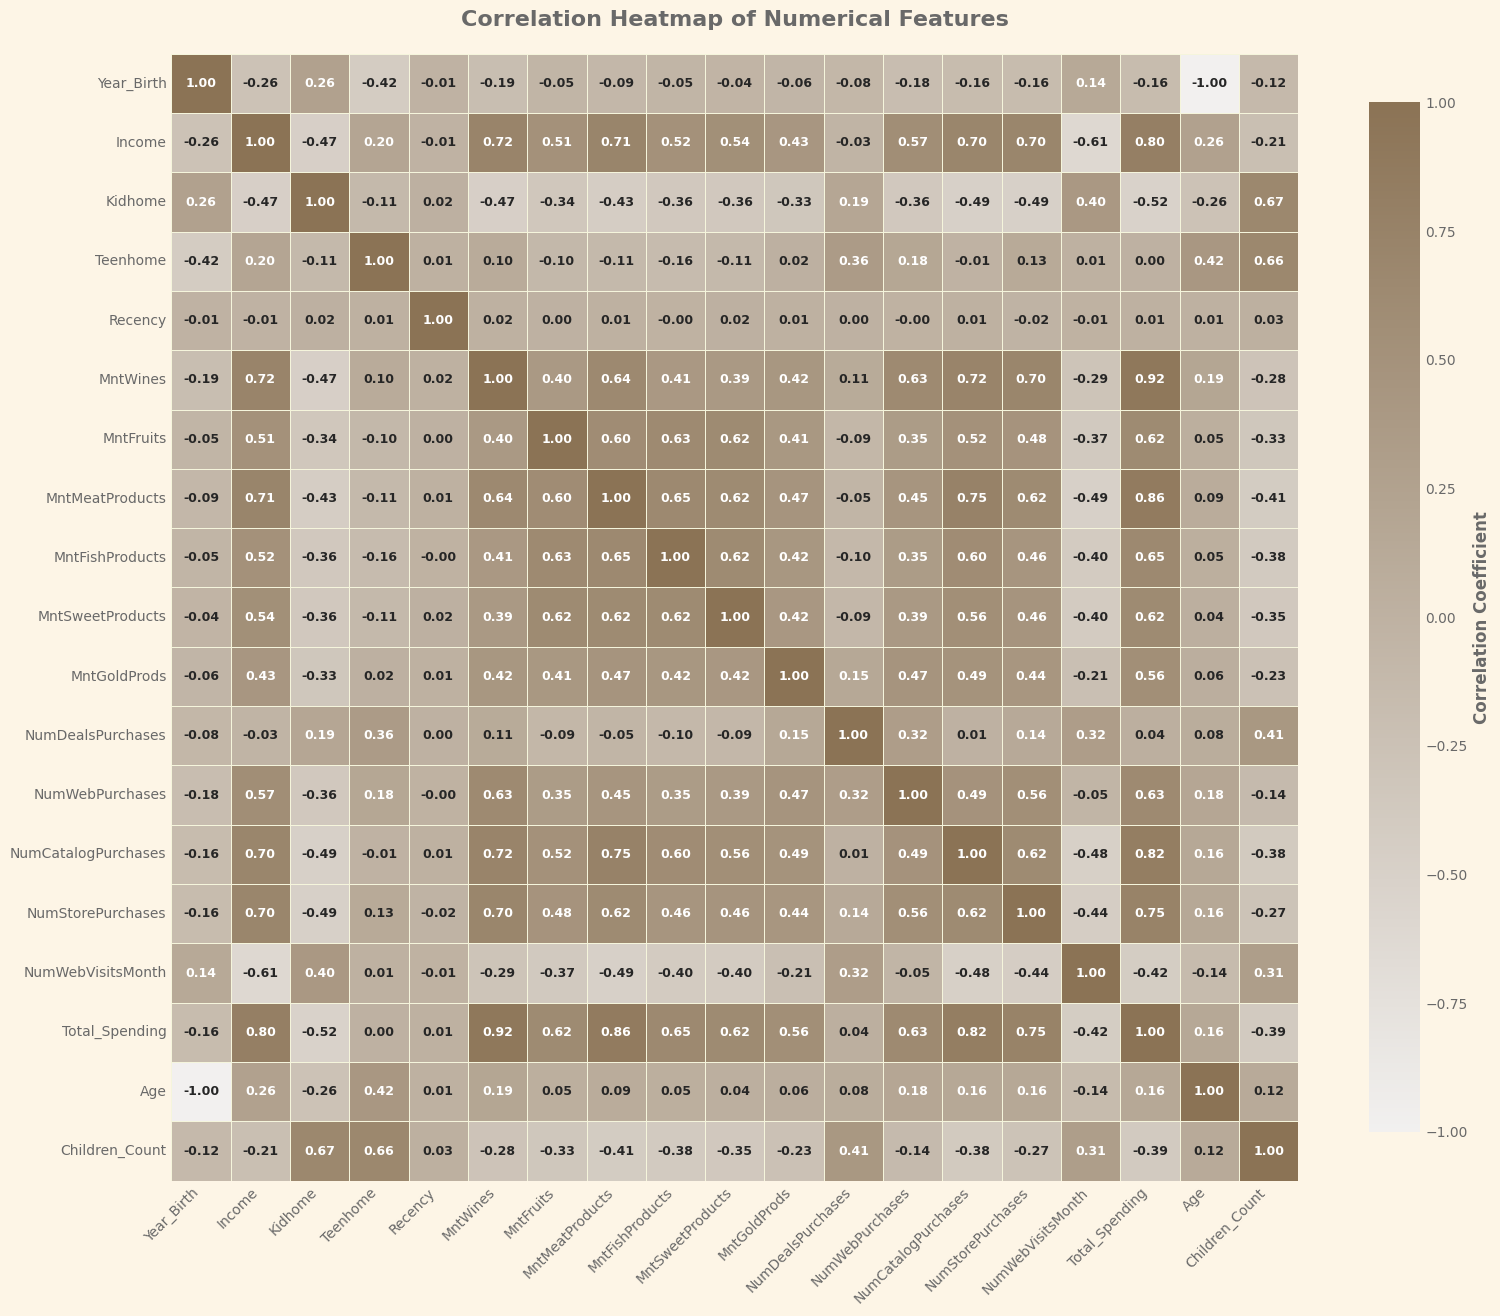


🔗 KEY CORRELATIONS:

 STRONG POSITIVE CORRELATIONS (r > 0.5):
  MntWines                  ↔ Total_Spending           : 0.921
  MntMeatProducts           ↔ Total_Spending           : 0.862
  NumCatalogPurchases       ↔ Total_Spending           : 0.825
  Income                    ↔ Total_Spending           : 0.803
  MntMeatProducts           ↔ NumCatalogPurchases      : 0.752
  NumStorePurchases         ↔ Total_Spending           : 0.749
  Income                    ↔ MntWines                 : 0.725
  MntWines                  ↔ NumCatalogPurchases      : 0.722
  Income                    ↔ MntMeatProducts          : 0.713
  Income                    ↔ NumStorePurchases        : 0.703

 STRONG NEGATIVE CORRELATIONS (r < -0.3):
  Year_Birth                ↔ Age                      : -1.000
  Income                    ↔ NumWebVisitsMonth        : -0.607
  Kidhome                   ↔ Total_Spending           : -0.520
  Kidhome                   ↔ NumCatalogPurchases      : -0.492
  Kidhom

In [22]:
# Select numerical features for correlation analysis
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                     'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth', 'Total_Spending', 'Age', 'Children_Count']

# Calculate correlation matrix
correlation_matrix = df_clean[numerical_features].corr()

plt.figure(figsize=(16, 14))


heatmap = sns.heatmap(correlation_matrix, 
                      # mask=mask,
                      annot=True, 
                      fmt='.2f',
                      cmap=sns.light_palette(vintage_colors['primary'], as_cmap=True, reverse=False),
                      center=0,
                      square=True,
                      cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
                      linewidths=0.5,
                      linecolor=vintage_colors['light'],
                      annot_kws={'size': 9, 'weight': 'bold'})

plt.title('Correlation Heatmap of Numerical Features', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Correlation Coefficient', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔗 KEY CORRELATIONS:")
print("=" * 50)

# Strong positive correlations (> 0.5)
strong_positive = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if corr > 0.5:
            strong_positive.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr))

print("\n STRONG POSITIVE CORRELATIONS (r > 0.5):")
for feat1, feat2, corr in sorted(strong_positive, key=lambda x: x[2], reverse=True)[:10]:
    print(f"  {feat1:25} ↔ {feat2:25}: {corr:.3f}")

# Strong negative correlations (< -0.3)
strong_negative = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if corr < -0.3:
            strong_negative.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr))

print(f"\n STRONG NEGATIVE CORRELATIONS (r < -0.3):")
for feat1, feat2, corr in sorted(strong_negative, key=lambda x: x[2])[:10]:
    print(f"  {feat1:25} ↔ {feat2:25}: {corr:.3f}")


print(f"\n INSIGHTS FROM CORRELATIONS:")
print(f"• Total Spending is strongly correlated with:")
for feat in ['MntWines', 'MntMeatProducts', 'Income', 'NumCatalogPurchases']:
    corr = correlation_matrix.loc['Total_Spending', feat]
    if abs(corr) > 0.3:
        direction = "positively" if corr > 0 else "negatively"
        print(f"  - {feat:20}: {direction} correlated (r = {corr:.3f})")

print(f"• Income shows interesting relationships:")
income_correlations = correlation_matrix['Income'].sort_values(ascending=False)
for feat, corr in income_correlations.items():
    if feat != 'Income' and abs(corr) > 0.2:
        direction = "positive" if corr > 0 else "negative"
        print(f"  - {feat:20}: {direction} correlation (r = {corr:.3f})")

print(f"• Web Visits vs Store Purchases:")
web_store_corr = correlation_matrix.loc['NumWebVisitsMonth', 'NumStorePurchases']
print(f"  - Customers who visit website frequently tend to {'not ' if web_store_corr < 0 else ''}make store purchases")
print(f"    Correlation: r = {web_store_corr:.3f}")

# Cluster analysis of correlations
print(f"\n FEATURE CLUSTERS (Highly Correlated Groups):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], 
                                  correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Features with very high correlation (|r| > 0.6):")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:8]:
        print(f"  {feat1:20} ↔ {feat2:20}: {corr:.3f}")

In [23]:
vintage_colors = set_vintage_theme()

print("Scaling the Dataset")
print("=" * 50)

numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                     'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth']

x = df_clean[numerical_features].copy()

print("Original Dataset Shape", x.shape)
print("Original Dataset Statistics ")
print(x.iloc[:,:5].describe().round(2))
print("\n")
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns = numerical_features, index = x.index)

print("Scaled Dataset Shape", x_scaled_df.shape)
print("Scaled Dataset Statistics \n")
print(x_scaled_df.iloc[:,:5].describe().round(2))



Scaling the Dataset
Original Dataset Shape (1841, 16)
Original Dataset Statistics 
       Year_Birth     Income  Kidhome  Teenhome  Recency
count     1841.00    1841.00  1841.00   1841.00  1841.00
mean      1969.11   47416.55     0.52      0.54    48.66
std         11.44   19080.66     0.55      0.54    28.88
min       1940.00    1730.00     0.00      0.00     0.00
25%       1960.00   32952.00     0.00      0.00    24.00
50%       1970.00   46098.00     0.00      1.00    49.00
75%       1977.00   62466.00     1.00      1.00    74.00
max       1996.00  113734.00     2.00      2.00    99.00


Scaled Dataset Shape (1841, 16)
Scaled Dataset Statistics 

       Year_Birth   Income  Kidhome  Teenhome  Recency
count     1841.00  1841.00  1841.00   1841.00  1841.00
mean        -0.00    -0.00     0.00      0.00    -0.00
std          1.00     1.00     1.00      1.00     1.00
min         -2.55    -2.40    -0.95     -1.00    -1.69
25%         -0.80    -0.76    -0.95     -1.00    -0.85
50%         



🔍 STEP 2: PRINCIPAL COMPONENT ANALYSIS (PCA)
✅ PCA TRANSFORMATION COMPLETE!
Transformed dataset shape: (1841, 16)

First 5 rows of PCA-transformed data:
      PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9  \
0  5.6993 -0.8149  1.8919  0.5061  1.5070  1.6292 -1.3968  1.5986 -0.8901   
1 -1.9376  0.4529 -1.6298 -0.1819  0.9616 -0.5973 -0.2708  0.7107  0.2822   
2  2.7877 -0.5878 -0.1323 -0.9450 -0.2820  0.6310 -0.3904 -0.2666  0.3411   
3 -2.3755 -1.2707  0.6807 -0.8335 -0.3825 -0.4847  0.0085 -0.2009 -0.1267   
4  0.4385 -0.3692  1.6075  1.5393 -0.1512 -1.3285 -0.3801 -0.1638 -0.4035   

     PC10    PC11    PC12    PC13    PC14    PC15    PC16  
0  1.4411 -1.0233 -0.5075  0.7815 -0.4395 -0.5546 -0.1941  
1  0.1666 -0.1600 -0.1516  0.1541  0.1471  0.0957  0.1443  
2 -1.0187  0.1613  1.8666 -0.0595  0.1376  0.1897  0.2603  
3 -0.1936  0.2446  0.2146 -0.0166  0.0654 -0.0862 -0.2610  
4 -0.3751  0.5196  0.3580  0.8499  0.2227  0.0553  0.5894  

📈 EXPLAINED VARIANCE 

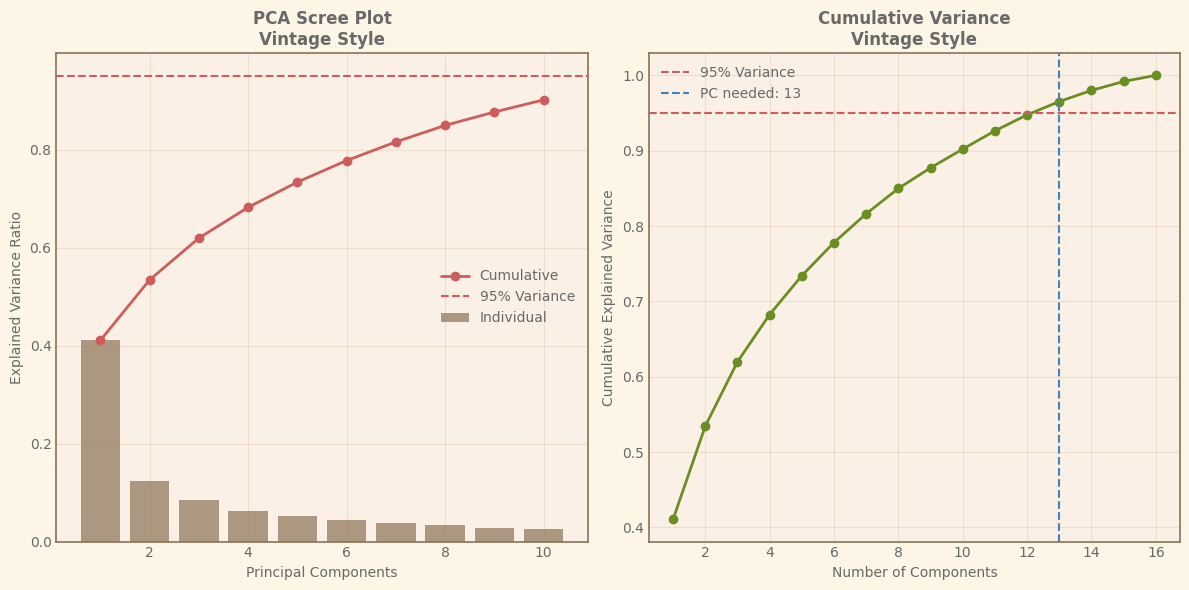


🔗 FEATURE LOADINGS FOR FIRST 3 PRINCIPAL COMPONENTS:

PC1 - Top 5 Most Influential Features:
  Income                   :  0.8640 (Positive)
  MntMeatProducts          :  0.8544 (Positive)
  NumCatalogPurchases      :  0.8532 (Positive)
  NumStorePurchases        :  0.8013 (Positive)
  MntWines                 :  0.7873 (Positive)

PC2 - Top 5 Most Influential Features:
  Teenhome                 :  0.7517 (Positive)
  NumDealsPurchases        :  0.7163 (Positive)
  Year_Birth               : -0.4783 (Negative)
  NumWebPurchases          :  0.4397 (Positive)
  NumWebVisitsMonth        :  0.3243 (Positive)

PC3 - Top 5 Most Influential Features:
  Year_Birth               :  0.5665 (Positive)
  NumWebVisitsMonth        :  0.5020 (Positive)
  NumDealsPurchases        :  0.4855 (Positive)
  Kidhome                  :  0.3696 (Positive)
  Teenhome                 : -0.3555 (Negative)


In [24]:
print("\n\n🔍 STEP 2: PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 50)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(x_scaled)

# Create DataFrame for PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=x.index)

print(f"✅ PCA TRANSFORMATION COMPLETE!")
print(f"Transformed dataset shape: {X_pca_df.shape}")
print(f"\nFirst 5 rows of PCA-transformed data:")
print(X_pca_df.head().round(4))

# Analyze explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\n📈 EXPLAINED VARIANCE ANALYSIS:")
print("-" * 40)
print(f"{'Component':<10} {'Variance':<12} {'Cumulative':<12}")
print("-" * 40)
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1:<9} {var:.4f}       {cum_var:.4f}")
    if cum_var > 0.95:  # Stop when we've covered 95% of variance
        break

# Visualize explained variance
plt.figure(figsize=(12, 6))

# Scree plot
plt.subplot(1, 2, 1)
components = range(1, len(explained_variance) + 1)
plt.bar(components[:10], explained_variance[:10], 
        color=vintage_colors['primary'], alpha=0.7, label='Individual')
plt.plot(components[:10], cumulative_variance[:10], 
         color=vintage_colors['accent1'], marker='o', linewidth=2, label='Cumulative')
plt.axhline(y=0.95, color=vintage_colors['alert'], linestyle='--', label='95% Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot\nVintage Style', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Cumulative variance plot
plt.subplot(1, 2, 2)
plt.plot(components, cumulative_variance, 
         color=vintage_colors['secondary'], marker='o', linewidth=2)
plt.axhline(y=0.95, color=vintage_colors['alert'], linestyle='--', label='95% Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, 
            color=vintage_colors['accent2'], linestyle='--', label=f'PC needed: {np.argmax(cumulative_variance >= 0.95) + 1}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance\nVintage Style', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature loadings analysis
print(f"\n🔗 FEATURE LOADINGS FOR FIRST 3 PRINCIPAL COMPONENTS:")
print("=" * 60)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=numerical_features)
for i in range(3):
    pc = f'PC{i+1}'
    print(f"\n{pc} - Top 5 Most Influential Features:")
    top_features = loadings_df[pc].abs().sort_values(ascending=False).head(5)
    for feature, loading in top_features.items():
        direction = "Positive" if loadings_df.loc[feature, pc] > 0 else "Negative"
        print(f"  {feature:25}: {loadings_df.loc[feature, pc]:7.4f} ({direction})")



 : 3D SCATTER PLOT VISUALIZATION


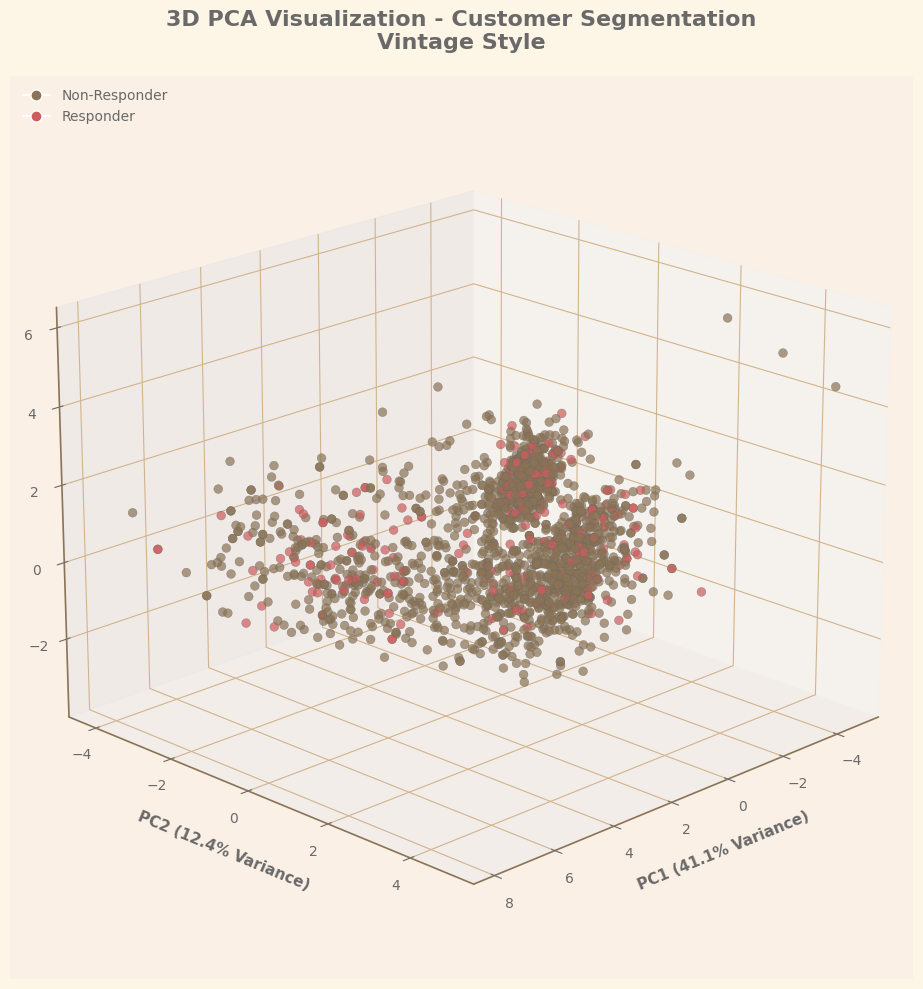


 INSIGHTS FROM 3D PCA VISUALIZATION:
Response Rate: 11.7%
Responders: 215 customers
Non-Responders: 1,626 customers

 PCA SPACE STATISTICS:

PC1:
  Responders mean    :   0.677
  Non-Responders mean:  -0.090
  Difference         :   0.767 (Higher in Responders)

PC2:
  Responders mean    :   0.052
  Non-Responders mean:  -0.007
  Difference         :   0.059 (Higher in Responders)

PC3:
  Responders mean    :   0.483
  Non-Responders mean:  -0.064
  Difference         :   0.547 (Higher in Responders)

 PROCESS SUMMARY:
• Original features: 16
• PCA components needed for 95% variance: 13
• Variance explained by first 3 PCs: 0.620
• 3D visualization shows customer segmentation based on PCA
• Color coding indicates campaign response behavior


In [25]:
print("\n\n : 3D SCATTER PLOT VISUALIZATION")
print("=" * 50)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors = df_clean['Response'].map({0: vintage_colors['primary'], 
                                   1: vintage_colors['accent1']})
labels = df_clean['Response'].map({0: 'Non-Responder', 1: 'Responder'})

# Create scatter plot
scatter = ax.scatter(X_pca_df['PC1'], X_pca_df['PC2'], X_pca_df['PC3'],
                    c=df_clean['Response'].map({0: vintage_colors['primary'], 
                                                1: vintage_colors['accent1']}),
                    s=40, alpha=0.7, edgecolor=vintage_colors['dark'], linewidth=0.3)

# Customize the plot
ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% Variance)', 
              fontsize=11, fontweight='bold', labelpad=10)
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% Variance)', 
              fontsize=11, fontweight='bold', labelpad=10)
ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.1f}% Variance)', 
              fontsize=11, fontweight='bold', labelpad=10)

ax.set_title('3D PCA Visualization - Customer Segmentation\nVintage Style', 
             fontsize=16, fontweight='bold', pad=20)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=vintage_colors['primary'], 
                             markersize=8, label='Non-Responder'),
                  plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=vintage_colors['accent1'], 
                             markersize=8, label='Responder')]

ax.legend(handles=legend_elements, loc='upper left', 
          bbox_to_anchor=(0, 1), framealpha=0.9)

# Add grid
ax.grid(True, alpha=0.3)

# Set viewing angle for better visualization
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

print(f"\n INSIGHTS FROM 3D PCA VISUALIZATION:")
print("=" * 50)

responder_pca = X_pca_df[df_clean['Response'] == 1]
non_responder_pca = X_pca_df[df_clean['Response'] == 0]

print(f"Response Rate: {(len(responder_pca) / len(df_clean) * 100):.1f}%")
print(f"Responders: {len(responder_pca):,} customers")
print(f"Non-Responders: {len(non_responder_pca):,} customers")

print(f"\n PCA SPACE STATISTICS:")
for pc in ['PC1', 'PC2', 'PC3']:
    resp_mean = responder_pca[pc].mean()
    non_resp_mean = non_responder_pca[pc].mean()
    diff = resp_mean - non_resp_mean
    
    print(f"\n{pc}:")
    print(f"  Responders mean    : {resp_mean:7.3f}")
    print(f"  Non-Responders mean: {non_resp_mean:7.3f}")
    print(f"  Difference         : {diff:7.3f} {'(Higher in Responders)' if diff > 0 else '(Higher in Non-Responders)'}")

# Summary
print(f"\n PROCESS SUMMARY:")
print(f"• Original features: {x.shape[1]}")
print(f"• PCA components needed for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")
print(f"• Variance explained by first 3 PCs: {cumulative_variance[2]:.3f}")
print(f"• 3D visualization shows customer segmentation based on PCA")
print(f"• Color coding indicates campaign response behavior")

 ELBOW METHOD FOR OPTIMAL CLUSTER DETERMINATION
Using first 10 principal components (explains 0.902 variance)
Data shape for clustering: (1841, 10)

🔍 TESTING CLUSTERS FROM 2 TO 14:
--------------------------------------------------
K =  2 | Inertia:     17134.21 | Silhouette Score: 0.3487
K =  3 | Inertia:     14322.23 | Silhouette Score: 0.2705
K =  4 | Inertia:     12988.52 | Silhouette Score: 0.1964
K =  5 | Inertia:     12132.29 | Silhouette Score: 0.1936
K =  6 | Inertia:     11471.97 | Silhouette Score: 0.1870
K =  7 | Inertia:     10913.94 | Silhouette Score: 0.1782
K =  8 | Inertia:     10531.17 | Silhouette Score: 0.1779
K =  9 | Inertia:     10144.07 | Silhouette Score: 0.1576
K = 10 | Inertia:      9862.57 | Silhouette Score: 0.1532
K = 11 | Inertia:      9625.47 | Silhouette Score: 0.1442
K = 12 | Inertia:      9363.09 | Silhouette Score: 0.1531
K = 13 | Inertia:      9130.95 | Silhouette Score: 0.1466
K = 14 | Inertia:      8941.17 | Silhouette Score: 0.1445


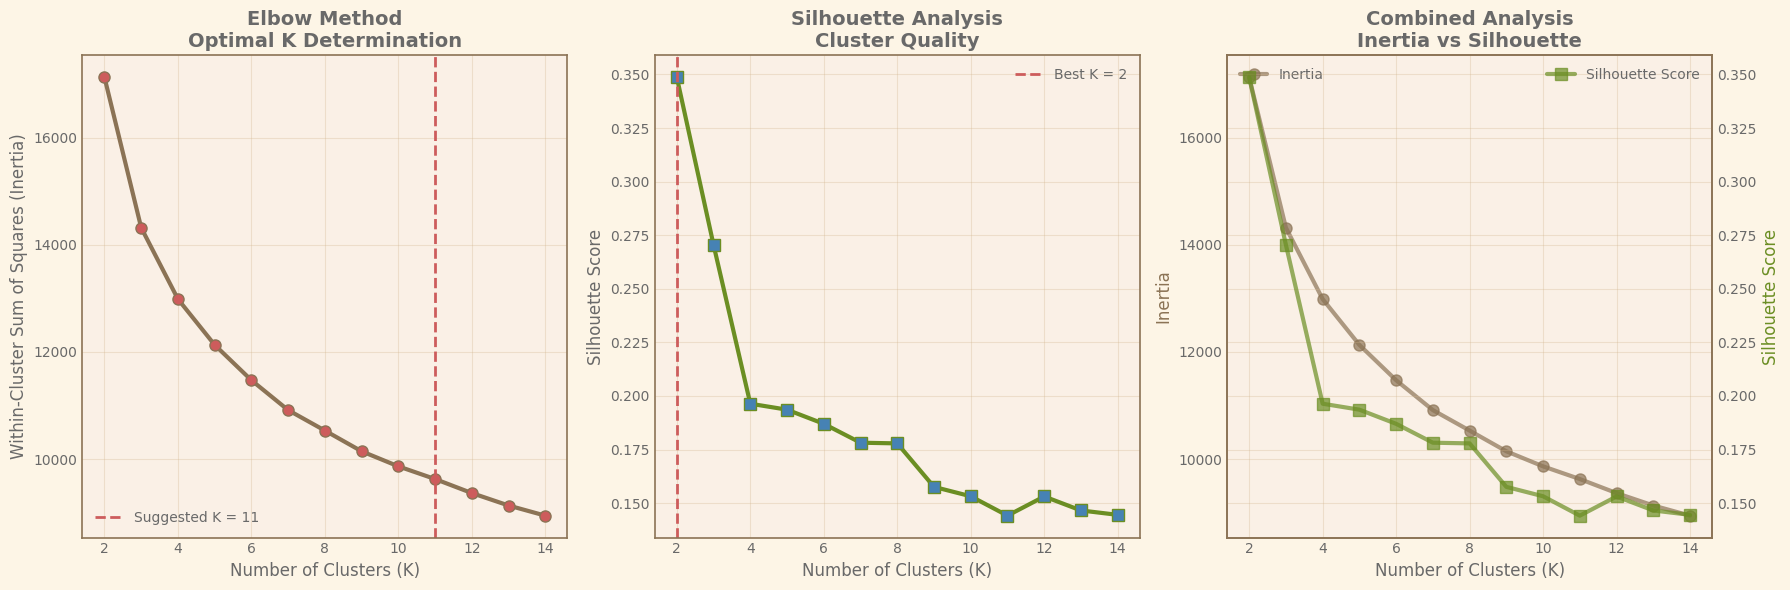


ELBOW METHOD ANALYSIS RESULTS:

Inertia Reduction Between Consecutive K values:
  K 2 → K 3:  16.41% reduction
  K 3 → K 4:   9.31% reduction
  K 4 → K 5:   6.59% reduction
  K 5 → K 6:   5.44% reduction
  K 6 → K 7:   4.86% reduction
  K 7 → K 8:   3.51% reduction
  K 8 → K 9:   3.68% reduction
  K 9 → K 10:   2.77% reduction
  K 10 → K 11:   2.40% reduction
  K 11 → K 12:   2.73% reduction
  K 12 → K 13:   2.48% reduction
  K 13 → K 14:   2.08% reduction

 DIMINISHING RETURNS ANALYSIS:
  Significant inertia reduction stops around K = 4
  (When reduction falls below 10%)

 RECOMMENDED NUMBER OF CLUSTERS:
  • Elbow Point (Inertia): K = 11
  • Best Silhouette Score: K = 2
  • Diminishing Returns:   K = 4

 SELECTED OPTIMAL K: 2
   Reason: Silhouette score preferred for better cluster separation

🔧 PERFORMING FINAL CLUSTERING WITH K = 2:

 CLUSTER SIZE DISTRIBUTION:
  Cluster 0: 1180 customers ( 64.1%)
  Cluster 1:  661 customers ( 35.9%)

 CLUSTER PROFILES (AVERAGE VALUES):
-----------

In [26]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

vintage_colors = set_vintage_theme()

print(" ELBOW METHOD FOR OPTIMAL CLUSTER DETERMINATION")
print("=" * 60)

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
X_pca_for_clustering = X_pca_df.iloc[:, :n_components_90]

print(f"Using first {n_components_90} principal components (explains {cumulative_variance[n_components_90-1]:.3f} variance)")
print(f"Data shape for clustering: {X_pca_for_clustering.shape}")

# Define range of clusters to test
k_range = range(2, 15)
inertia = []
silhouette_scores = []

print(f"\n🔍 TESTING CLUSTERS FROM {k_range.start} TO {k_range.stop-1}:")
print("-" * 50)

for k in k_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_for_clustering)
    
    # Calculate inertia (within-cluster sum of squares)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_pca_for_clustering, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    print(f"K = {k:2d} | Inertia: {kmeans.inertia_:12.2f} | Silhouette Score: {silhouette_avg:.4f}")

# Create the elbow plot visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Elbow Curve (Inertia)
ax1.plot(k_range, inertia, 'o-', color=vintage_colors['primary'], 
         linewidth=3, markersize=8, markerfacecolor=vintage_colors['accent1'])
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=12)
ax1.set_title('Elbow Method\nOptimal K Determination', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add annotations for the "elbow" point
# Calculate the second derivative to find the elbow point
inertia_diff = np.diff(inertia)
inertia_diff2 = np.diff(inertia_diff)
elbow_point = np.argmin(inertia_diff2) + 3  # +3 because of double diff and range starting at 2

ax1.axvline(x=elbow_point, color=vintage_colors['alert'], linestyle='--', 
            linewidth=2, label=f'Suggested K = {elbow_point}')
ax1.legend()

# Plot 2: Silhouette Scores
ax2.plot(k_range, silhouette_scores, 's-', color=vintage_colors['secondary'], 
         linewidth=3, markersize=8, markerfacecolor=vintage_colors['accent2'])
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Analysis\nCluster Quality', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Find optimal K based on silhouette score
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
ax2.axvline(x=optimal_k_silhouette, color=vintage_colors['alert'], linestyle='--', 
            linewidth=2, label=f'Best K = {optimal_k_silhouette}')
ax2.legend()

# Plot 3: Combined Analysis
ax3.plot(k_range, inertia, 'o-', color=vintage_colors['primary'], 
         linewidth=3, markersize=8, label='Inertia', alpha=0.7)
ax3_twin = ax3.twinx()
ax3_twin.plot(k_range, silhouette_scores, 's-', color=vintage_colors['secondary'], 
              linewidth=3, markersize=8, label='Silhouette Score', alpha=0.7)

ax3.set_xlabel('Number of Clusters (K)', fontsize=12)
ax3.set_ylabel('Inertia', fontsize=12, color=vintage_colors['primary'])
ax3_twin.set_ylabel('Silhouette Score', fontsize=12, color=vintage_colors['secondary'])
ax3.set_title('Combined Analysis\nInertia vs Silhouette', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add legends
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Detailed analysis and recommendations
print(f"\nELBOW METHOD ANALYSIS RESULTS:")
print("=" * 50)

# Calculate percentage reduction in inertia
inertia_reduction = []
for i in range(1, len(inertia)):
    reduction = ((inertia[i-1] - inertia[i]) / inertia[i-1]) * 100
    inertia_reduction.append(reduction)

print(f"\nInertia Reduction Between Consecutive K values:")
for i, reduction in enumerate(inertia_reduction):
    k = i + 3  # Starting from K=3
    print(f"  K {k-1} → K {k}: {reduction:6.2f}% reduction")

# Find the point of diminishing returns
diminishing_returns = np.argmax(np.array(inertia_reduction) < 10) + 3
print(f"\n DIMINISHING RETURNS ANALYSIS:")
print(f"  Significant inertia reduction stops around K = {diminishing_returns}")
print(f"  (When reduction falls below 10%)")

print(f"\n RECOMMENDED NUMBER OF CLUSTERS:")
print(f"  • Elbow Point (Inertia): K = {elbow_point}")
print(f"  • Best Silhouette Score: K = {optimal_k_silhouette}")
print(f"  • Diminishing Returns:   K = {diminishing_returns}")

# Choose the optimal K (you can modify this logic based on your preference)
if elbow_point == optimal_k_silhouette:
    optimal_k = elbow_point
    reason = "Both methods agree"
else:
    # Prefer silhouette score if there's a conflict, as it considers cluster separation
    optimal_k = optimal_k_silhouette
    reason = "Silhouette score preferred for better cluster separation"

print(f"\n SELECTED OPTIMAL K: {optimal_k}")
print(f"   Reason: {reason}")

# Perform final clustering with optimal K
print(f"\n🔧 PERFORMING FINAL CLUSTERING WITH K = {optimal_k}:")
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_pca_for_clustering)

# Add cluster labels to the original dataframe
df_clean['Cluster'] = cluster_labels

# Analyze cluster characteristics
print(f"\n CLUSTER SIZE DISTRIBUTION:")
cluster_sizes = df_clean['Cluster'].value_counts().sort_index()
for cluster_id, size in cluster_sizes.items():
    percentage = (size / len(df_clean)) * 100
    print(f"  Cluster {cluster_id}: {size:4} customers ({percentage:5.1f}%)")

# Calculate cluster statistics for key features
print(f"\n CLUSTER PROFILES (AVERAGE VALUES):")
print("-" * 70)
key_features = ['Income', 'Total_Spending', 'Age', 'Children_Count', 'Response']

cluster_profiles = df_clean.groupby('Cluster')[key_features].mean().round(2)

print(f"{'Cluster':<8} {'Income':<10} {'Spending':<10} {'Age':<8} {'Children':<10} {'Response Rate':<12}")
print("-" * 70)
for cluster_id, row in cluster_profiles.iterrows():
    response_rate = row['Response'] * 100
    print(f"{cluster_id:<8} ${row['Income']:<9,.0f} ${row['Total_Spending']:<9,.0f} {row['Age']:<7.0f} {row['Children_Count']:<9.1f} {response_rate:<11.1f}%")

# Additional insights
print(f"\n🎭 CLUSTER CHARACTERISTICS:")
for cluster_id in range(optimal_k):
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    
    # Find dominant characteristics
    highest_income = cluster_data['Income'].mean() > df_clean['Income'].mean()
    highest_spending = cluster_data['Total_Spending'].mean() > df_clean['Total_Spending'].mean()
    highest_response = cluster_data['Response'].mean() > df_clean['Response'].mean()
    
    characteristics = []
    if highest_income: characteristics.append("High Income")
    if highest_spending: characteristics.append("High Spending")
    if highest_response: characteristics.append("High Response Rate")
    if not characteristics: characteristics.append("Average Profile")
    
    print(f"  Cluster {cluster_id}: {', '.join(characteristics)}")

print(f"\n CLUSTERING COMPLETE!")
print(f"   Optimal number of clusters: {optimal_k}")
print(f"   Cluster labels added to 'df_clean' as 'Cluster' column")
print(f"   Total customers clustered: {len(df_clean):,}")

🔢 CLUSTER CONFIGURATION
Choose the number of clusters for customer segmentation:
2 clusters: Basic segmentation (High/Low value)
3 clusters: Standard segmentation (High/Medium/Low value)
4+ clusters: Detailed segmentation (More granular segments)

Recommended: 3-4 clusters for optimal balance



Enter number of clusters (2-8):  3


🎯 ANALYZING CUSTOMER CLUSTERS (K=3)
Total Customers: 1,841
Number of Clusters: 3



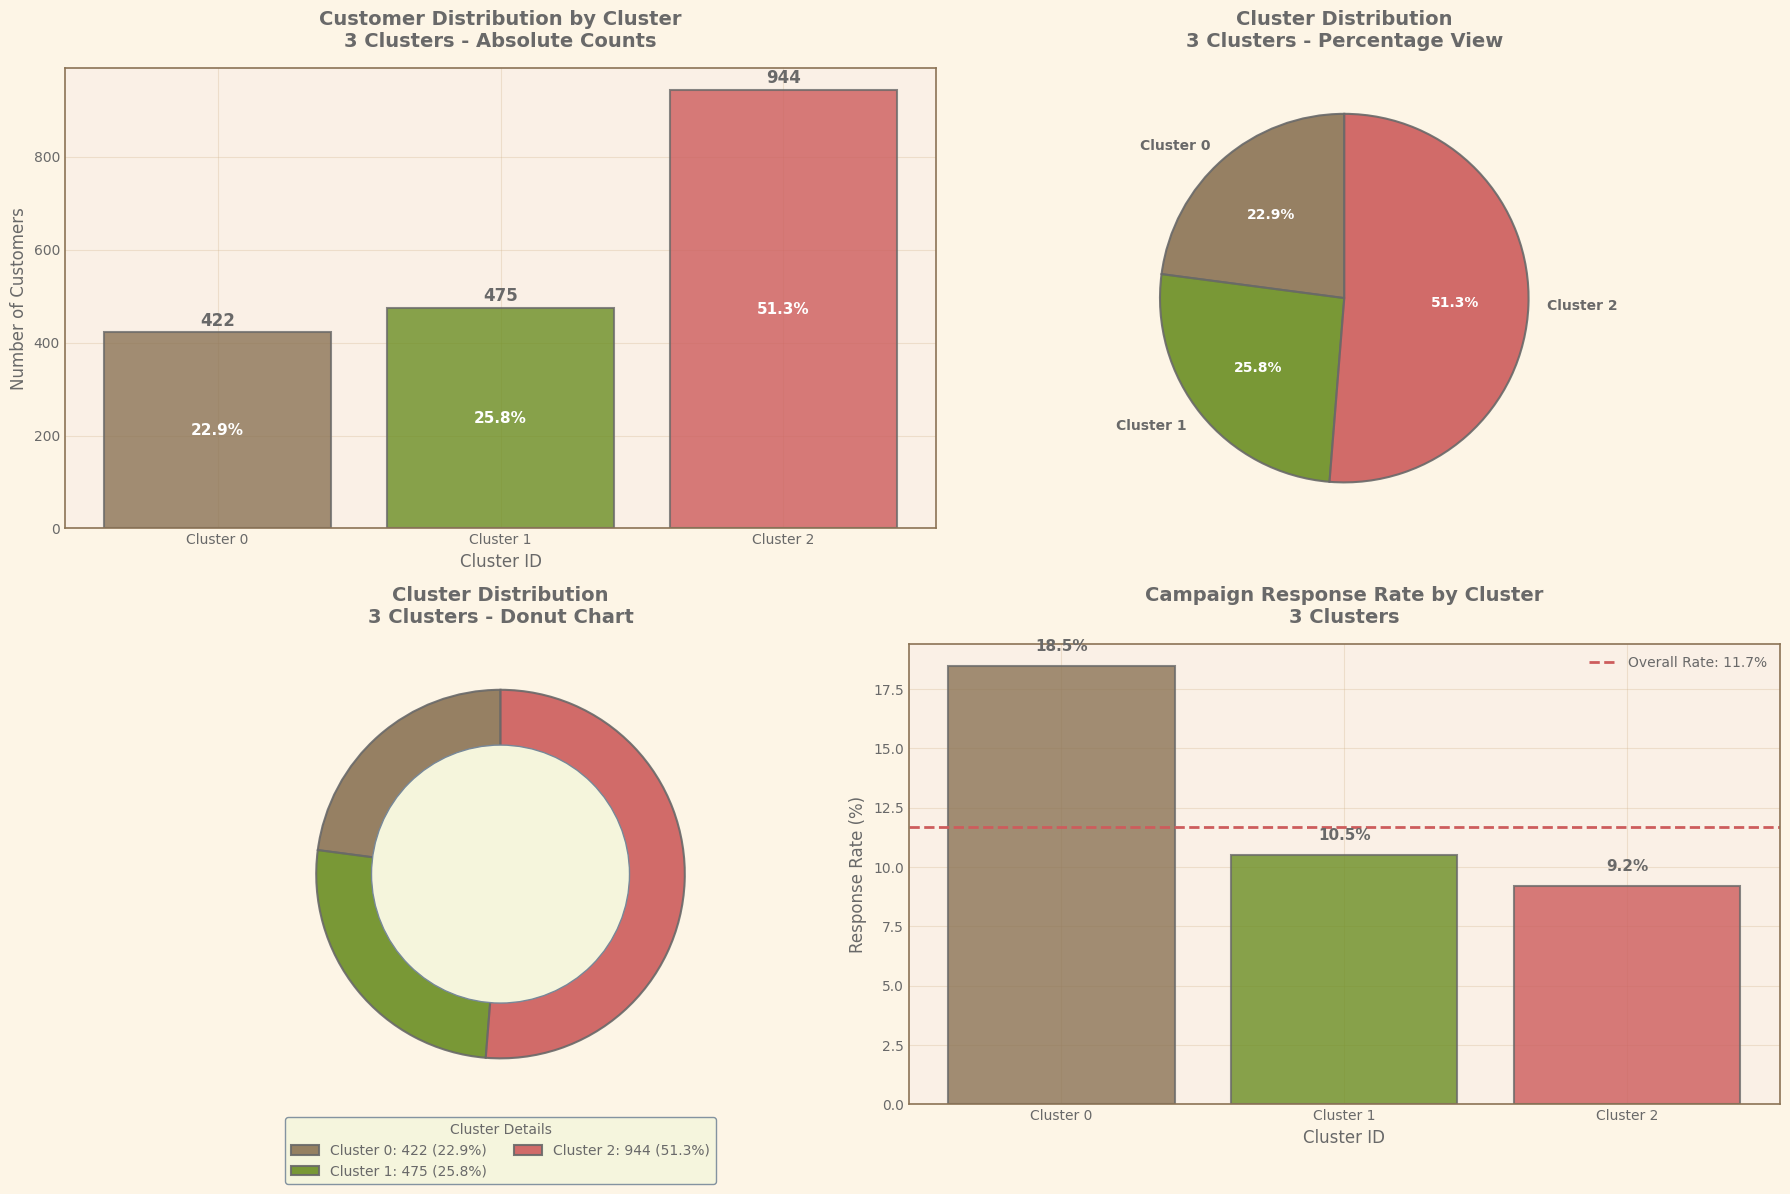


📋 DETAILED CLUSTER STATISTICS (K=3):
Cluster    Customers    Percentage   Response Rate   Key Characteristics
-------------------------------------------------------------------------------------
Cluster 0    422          22.9       % 18.5          % High Income, High Total_Spending
Cluster 1    475          25.8       % 10.5          % High Income
Cluster 2    944          51.3       % 9.2           % Low Income, Low Total_Spending

🎯 KEY INSIGHTS FROM 3-CLUSTER DISTRIBUTION:
• Largest Cluster: Cluster 2 (944 customers, 51.3%)
• Smallest Cluster: Cluster 0 (422 customers, 22.9%)
• Size Ratio: 2.2x difference
• Best Response: Cluster 0 (18.5% response rate)
• Worst Response: Cluster 2 (9.2% response rate)
• Response Difference: 9.3 percentage points
• Cluster Balance: Well-balanced (std/mean ratio: 0.468)

💡 STRATEGIC RECOMMENDATIONS FOR 3 CLUSTERS:
1. Focus marketing efforts on Cluster 0 (highest response rate)
2. Investigate Cluster 2 for potential optimization
3. Cluster 2 represen

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

def analyze_custom_clusters(n_clusters=2):
    """
    Analyze and visualize customer clusters based on user-specified number of clusters
    """
    # Set vintage theme
    vintage_colors = set_vintage_theme()
    
    print(f"🎯 ANALYZING CUSTOMER CLUSTERS (K={n_clusters})")
    print("=" * 60)
    
    # Prepare data for clustering
    numerical_features = ['Income', 'Total_Spending', 'Age', 'Children_Count', 
                         'MntWines', 'MntMeatProducts', 'NumWebPurchases', 
                         'NumStorePurchases', 'Recency']
    
    X = df_clean[numerical_features].copy()
    
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform K-means clustering with user-specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Add cluster labels to dataframe
    df_clean['Cluster'] = cluster_labels
    
    # Get cluster distribution
    cluster_distribution = df_clean['Cluster'].value_counts().sort_index()
    total_customers = len(df_clean)
    percentages = (cluster_distribution / total_customers) * 100
    
    print(f"Total Customers: {total_customers:,}")
    print(f"Number of Clusters: {n_clusters}")
    print("\n" + "=" * 50)
    
    # Create comprehensive visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    
    # Define colors based on number of clusters
    color_palette = [vintage_colors['primary'], vintage_colors['secondary'], 
                     vintage_colors['accent1'], vintage_colors['accent2'],
                     vintage_colors['accent3'], vintage_colors['accent4'],
                     vintage_colors['neutral'], vintage_colors['light']]
    colors = color_palette[:n_clusters]
    
    # Plot 1: Bar Chart - Customer Count by Cluster
    bars = ax1.bar(range(len(cluster_distribution)), cluster_distribution.values,
                   color=colors,
                   alpha=0.8,
                   edgecolor=vintage_colors['dark'],
                   linewidth=1.5)
    
    # Add count labels on top of bars
    for bar, count in zip(bars, cluster_distribution.values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{count:,}',
                 ha='center', va='bottom',
                 fontsize=12, fontweight='bold',
                 color=vintage_colors['dark'])
    
    # Add percentage labels inside bars
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height/2,
                 f'{percentage:.1f}%',
                 ha='center', va='center',
                 fontsize=11, fontweight='bold',
                 color='white')
    
    ax1.set_xlabel('Cluster ID', fontsize=12)
    ax1.set_ylabel('Number of Customers', fontsize=12)
    ax1.set_title(f'Customer Distribution by Cluster\n{n_clusters} Clusters - Absolute Counts', 
                  fontsize=14, fontweight='bold', pad=15)
    ax1.set_xticks(range(len(cluster_distribution)))
    ax1.set_xticklabels([f'Cluster {i}' for i in cluster_distribution.index])
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Pie Chart - Percentage Distribution
    wedges, texts, autotexts = ax2.pie(cluster_distribution.values, 
                                       labels=[f'Cluster {i}' for i in cluster_distribution.index],
                                       colors=colors,
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       textprops={'fontsize': 10, 'color': vintage_colors['dark'], 'fontweight': 'bold'},
                                       wedgeprops={'edgecolor': vintage_colors['dark'], 
                                                  'linewidth': 1.5,
                                                  'alpha': 0.9})
    
    # Customize percentage text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
    ax2.set_title(f'Cluster Distribution\n{n_clusters} Clusters - Percentage View', 
                  fontsize=14, fontweight='bold', pad=15)
    
    # Plot 3: Donut Chart - Enhanced Visualization
    wedges, texts = ax3.pie(cluster_distribution.values, 
                           colors=colors,
                           startangle=90,
                           wedgeprops={'edgecolor': vintage_colors['dark'], 
                                      'linewidth': 1.5,
                                      'alpha': 0.9})
    
    # Create donut hole
    centre_circle = plt.Circle((0,0), 0.70, fc=vintage_colors['light'], 
                              edgecolor=vintage_colors['neutral'], linewidth=1)
    ax3.add_artist(centre_circle)
    
    # Add custom labels with counts and percentages
    legend_labels = []
    for i, (cluster_id, count) in enumerate(cluster_distribution.items()):
        percentage = percentages[i]
        legend_labels.append(f'Cluster {cluster_id}: {count:,} ({percentage:.1f}%)')
    
    ax3.legend(wedges, legend_labels,
              title="Cluster Details",
              loc="center",
              bbox_to_anchor=(0.5, -0.1),
              frameon=True,
              framealpha=0.9,
              edgecolor=vintage_colors['neutral'],
              facecolor=vintage_colors['light'],
              ncol=2 if n_clusters <= 4 else 3)
    
    ax3.set_title(f'Cluster Distribution\n{n_clusters} Clusters - Donut Chart', 
                  fontsize=14, fontweight='bold', pad=15)
    
    # Plot 4: Response Rate by Cluster
    cluster_response_rates = df_clean.groupby('Cluster')['Response'].mean() * 100
    response_bars = ax4.bar(range(len(cluster_response_rates)), cluster_response_rates.values,
                           color=colors,
                           alpha=0.8,
                           edgecolor=vintage_colors['dark'],
                           linewidth=1.5)
    
    # Add response rate labels on bars
    for bar, rate in zip(response_bars, cluster_response_rates.values):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{rate:.1f}%',
                 ha='center', va='bottom',
                 fontsize=11, fontweight='bold',
                 color=vintage_colors['dark'])
    
    ax4.set_xlabel('Cluster ID', fontsize=12)
    ax4.set_ylabel('Response Rate (%)', fontsize=12)
    ax4.set_title(f'Campaign Response Rate by Cluster\n{n_clusters} Clusters', 
                  fontsize=14, fontweight='bold', pad=15)
    ax4.set_xticks(range(len(cluster_response_rates)))
    ax4.set_xticklabels([f'Cluster {i}' for i in cluster_response_rates.index])
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add horizontal line for overall response rate
    overall_response_rate = df_clean['Response'].mean() * 100
    ax4.axhline(y=overall_response_rate, color=vintage_colors['alert'], linestyle='--', 
                linewidth=2, label=f'Overall Rate: {overall_response_rate:.1f}%')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed cluster statistics
    print(f"\n📋 DETAILED CLUSTER STATISTICS (K={n_clusters}):")
    print("=" * 70)
    print(f"{'Cluster':<10} {'Customers':<12} {'Percentage':<12} {'Response Rate':<15} {'Key Characteristics'}")
    print("-" * 85)
    
    # Analyze key characteristics for each cluster
    key_features = ['Income', 'Total_Spending', 'Age', 'Children_Count']
    overall_means = df_clean[key_features].mean()
    
    for cluster_id in cluster_distribution.index:
        cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
        count = len(cluster_data)
        percentage = (count / total_customers) * 100
        response_rate = cluster_data['Response'].mean() * 100
        
        # Identify key characteristics
        characteristics = []
        for feature in key_features:
            cluster_mean = cluster_data[feature].mean()
            overall_mean = overall_means[feature]
            diff_percentage = ((cluster_mean - overall_mean) / overall_mean) * 100
            
            if abs(diff_percentage) > 15:  # Significant difference threshold
                if diff_percentage > 0:
                    char = f"High {feature}"
                else:
                    char = f"Low {feature}"
                characteristics.append(char)
        
        # If no significant differences, mark as balanced
        if not characteristics:
            characteristics = ["Balanced Profile"]
        
        print(f"Cluster {cluster_id:<4} {count:<12,} {percentage:<11.1f}% {response_rate:<14.1f}% {', '.join(characteristics[:2])}")  # Show top 2 characteristics
    
    # Additional insights
    print(f"\n🎯 KEY INSIGHTS FROM {n_clusters}-CLUSTER DISTRIBUTION:")
    print("=" * 60)
    
    # Largest and smallest clusters
    largest_cluster = cluster_distribution.idxmax()
    largest_count = cluster_distribution.max()
    largest_percentage = percentages[largest_cluster]
    
    smallest_cluster = cluster_distribution.idxmin()
    smallest_count = cluster_distribution.min()
    smallest_percentage = percentages[smallest_cluster]
    
    print(f"• Largest Cluster: Cluster {largest_cluster} ({largest_count:,} customers, {largest_percentage:.1f}%)")
    print(f"• Smallest Cluster: Cluster {smallest_cluster} ({smallest_count:,} customers, {smallest_percentage:.1f}%)")
    print(f"• Size Ratio: {largest_count/smallest_count:.1f}x difference")
    
    # Response rate analysis
    best_response_cluster = cluster_response_rates.idxmax()
    best_response_rate = cluster_response_rates.max()
    worst_response_cluster = cluster_response_rates.idxmin()
    worst_response_rate = cluster_response_rates.min()
    
    print(f"• Best Response: Cluster {best_response_cluster} ({best_response_rate:.1f}% response rate)")
    print(f"• Worst Response: Cluster {worst_response_cluster} ({worst_response_rate:.1f}% response rate)")
    print(f"• Response Difference: {best_response_rate - worst_response_rate:.1f} percentage points")
    
    # Cluster balance assessment
    balance_metric = cluster_distribution.std() / cluster_distribution.mean()
    balance_status = "Well-balanced" if balance_metric < 0.5 else "Imbalanced"
    print(f"• Cluster Balance: {balance_status} (std/mean ratio: {balance_metric:.3f})")
    
    # Strategic recommendations
    print(f"\n💡 STRATEGIC RECOMMENDATIONS FOR {n_clusters} CLUSTERS:")
    print("=" * 50)
    print(f"1. Focus marketing efforts on Cluster {best_response_cluster} (highest response rate)")
    print(f"2. Investigate Cluster {worst_response_cluster} for potential optimization")
    print(f"3. Cluster {largest_cluster} represents your core customer base")
    print(f"4. Consider tailored strategies for each of the {n_clusters} cluster segments")
    
    print(f"\n✅ {n_clusters}-CLUSTER ANALYSIS COMPLETE!")
    print(f"   Total customers analyzed: {total_customers:,}")
    print(f"   Clusters created: {n_clusters}")
    print(f"   Overall response rate: {overall_response_rate:.1f}%")
    
    return df_clean

# USER INPUT: Choose number of clusters
print("🔢 CLUSTER CONFIGURATION")
print("=" * 30)
print("Choose the number of clusters for customer segmentation:")
print("2 clusters: Basic segmentation (High/Low value)")
print("3 clusters: Standard segmentation (High/Medium/Low value)") 
print("4+ clusters: Detailed segmentation (More granular segments)")
print("\nRecommended: 3-4 clusters for optimal balance")

# Get user input with validation
while True:
    try:
        n_clusters = int(input("\nEnter number of clusters (2-8): "))
        if 2 <= n_clusters <= 8:
            break
        else:
            print("Please enter a number between 2 and 8.")
    except ValueError:
        print("Please enter a valid number.")

# Run the analysis with user-specified number of clusters
df_clean = analyze_custom_clusters(n_clusters)

print(f"\n🎉 ANALYSIS READY!")
print(f"Your customer base has been segmented into {n_clusters} distinct clusters")
print(f"Use df_clean['Cluster'] to access the cluster assignments")

 CLUSTER CHARACTERISTICS: INCOME & SPENDING ANALYSIS
Analyzing 3 clusters with 1,841 total customers



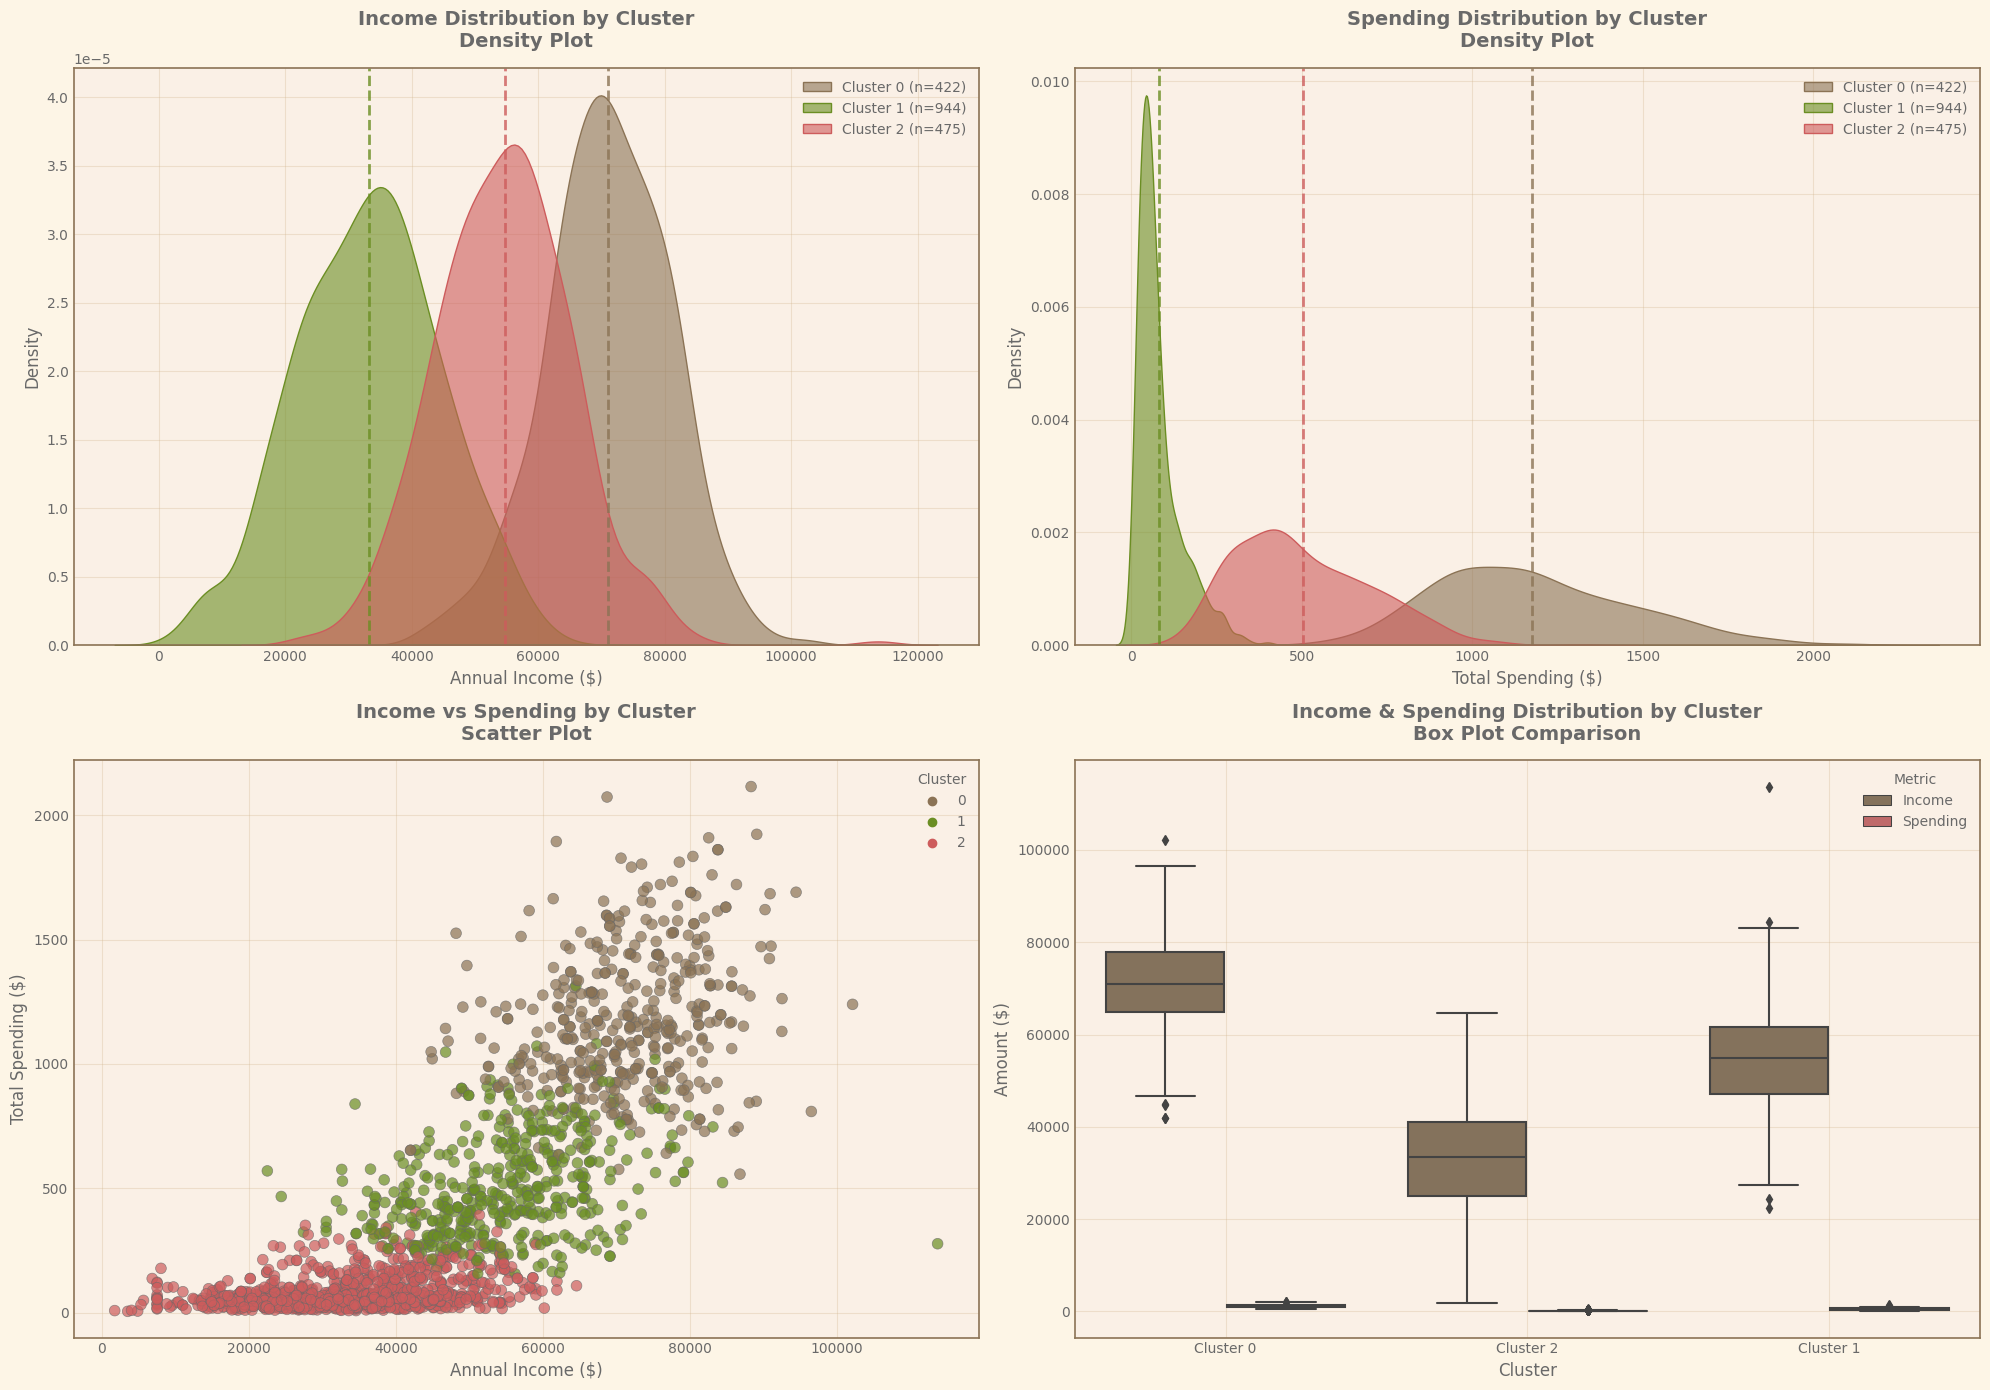


 DETAILED CLUSTER STATISTICS: INCOME & SPENDING

Cluster      Customers  Avg Income   Avg Spending   Spending/Income Response Rate
-------------------------------------------------------------------------------------
Cluster 0    422.0      $71,067      $1,174         1.7           % 18.0       %
Cluster 1    475.0      $54,703      $503           0.9           % 11.0       %
Cluster 2    944.0      $33,178      $81            0.3           % 9.0        %

 COMPARATIVE ANALYSIS:
Overall Averages:
  Income: $47,417
  Spending: $441
  Spending/Income Ratio: 0.8%

Cluster Comparisons vs Overall:

Cluster 0:
  Income: Above average by 49.9%
  Spending: Above average by 166.5%
  Spending Ratio: Higher by 0.9 percentage points

Cluster 1:
  Income: Above average by 15.4%
  Spending: Above average by 14.2%
  Spending Ratio: Higher by 0.2 percentage points

Cluster 2:
  Income: Below average by 30.0%
  Spending: Below average by 81.6%
  Spending Ratio: Lower by 0.5 percentage points

 CLUSTER

In [40]:
vintage_colors = set_vintage_theme()

print(" CLUSTER CHARACTERISTICS: INCOME & SPENDING ANALYSIS")
print("=" * 60)

# Get cluster information
clusters = df_clean['Cluster'].unique()
n_clusters = len(clusters)

print(f"Analyzing {n_clusters} clusters with {len(df_clean):,} total customers")
print("\n" + "=" * 50)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

# Define colors for clusters
if n_clusters == 2:
    cluster_colors = [vintage_colors['primary'], vintage_colors['accent1']]
    cluster_names = ['Cluster 0', 'Cluster 1']
elif n_clusters == 3:
    cluster_colors = [vintage_colors['primary'], 
                      vintage_colors['secondary'], 
                      vintage_colors['accent1']]
    cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']
else:
    cluster_colors = [vintage_colors['primary'], vintage_colors['secondary'], 
                     vintage_colors['accent1'], vintage_colors['accent2'],
                     vintage_colors['accent3']][:n_clusters]
    cluster_names = [f'Cluster {i}' for i in range(n_clusters)]

# Income Distribution by Cluster
for i, cluster_id in enumerate(clusters):
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    sns.kdeplot(data=cluster_data, x='Income', 
                fill=True, alpha=0.6, 
                color=cluster_colors[i], 
                label=f'{cluster_names[i]} (n={len(cluster_data):,})',
                ax=ax1)

ax1.set_xlabel('Annual Income ($)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('Income Distribution by Cluster\nDensity Plot', 
              fontsize=14, fontweight='bold', pad=15)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add mean income lines
for i, cluster_id in enumerate(clusters):
    mean_income = df_clean[df_clean['Cluster'] == cluster_id]['Income'].mean()
    ax1.axvline(mean_income, color=cluster_colors[i], linestyle='--', 
                linewidth=2, alpha=0.8, label=f'{cluster_names[i]} Mean')

# Spending Distribution by Cluster
for i, cluster_id in enumerate(clusters):
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    sns.kdeplot(data=cluster_data, x='Total_Spending', 
                fill=True, alpha=0.6, 
                color=cluster_colors[i], 
                label=f'{cluster_names[i]} (n={len(cluster_data):,})',
                ax=ax2)

ax2.set_xlabel('Total Spending ($)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Spending Distribution by Cluster\nDensity Plot', 
              fontsize=14, fontweight='bold', pad=15)
ax2.legend()
ax2.grid(True, alpha=0.3)


for i, cluster_id in enumerate(clusters):
    mean_spending = df_clean[df_clean['Cluster'] == cluster_id]['Total_Spending'].mean()
    ax2.axvline(mean_spending, color=cluster_colors[i], linestyle='--', 
                linewidth=2, alpha=0.8, label=f'{cluster_names[i]} Mean')

# Income vs Spending Scatter Plot
scatter = sns.scatterplot(data=df_clean, x='Income', y='Total_Spending',
                         hue='Cluster', palette=cluster_colors,
                         s=60, alpha=0.7, edgecolor=vintage_colors['dark'],
                         linewidth=0.5, ax=ax3)

ax3.set_xlabel('Annual Income ($)', fontsize=12)
ax3.set_ylabel('Total Spending ($)', fontsize=12)
ax3.set_title('Income vs Spending by Cluster\nScatter Plot', 
              fontsize=14, fontweight='bold', pad=15)
ax3.legend(title='Cluster')
ax3.grid(True, alpha=0.3)

# Box Plot Comparison
boxplot_data = []
for cluster_id in clusters:
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    for metric, values in [('Income', cluster_data['Income']), 
                          ('Spending', cluster_data['Total_Spending'])]:
        for value in values:
            boxplot_data.append({
                'Cluster': cluster_names[cluster_id],
                'Metric': metric,
                'Value': value
            })

boxplot_df = pd.DataFrame(boxplot_data)

sns.boxplot(data=boxplot_df, x='Cluster', y='Value', hue='Metric',
            palette=[vintage_colors['primary'], vintage_colors['accent1']],
            ax=ax4)

ax4.set_xlabel('Cluster', fontsize=12)
ax4.set_ylabel('Amount ($)', fontsize=12)
ax4.set_title('Income & Spending Distribution by Cluster\nBox Plot Comparison', 
              fontsize=14, fontweight='bold', pad=15)
ax4.legend(title='Metric')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed statistical analysis
print("\n DETAILED CLUSTER STATISTICS: INCOME & SPENDING")
print("=" * 70)

# Calculate comprehensive statistics for each cluster
cluster_stats = df_clean.groupby('Cluster').agg({
    'Income': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Total_Spending': ['mean', 'median', 'std', 'min', 'max'],
    'Spending_Income_Ratio': 'mean',
    'Response': 'mean'
}).round(2)

# Flatten column names
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]
cluster_stats = cluster_stats.reset_index()

print(f"\n{'Cluster':<12} {'Customers':<10} {'Avg Income':<12} {'Avg Spending':<14} {'Spending/Income':<15} {'Response Rate':<12}")
print("-" * 85)

for _, row in cluster_stats.iterrows():
    cluster_id = int(row['Cluster'])
    response_rate = row['Response_mean'] * 100
    spending_ratio = row['Spending_Income_Ratio_mean']
    
    print(f"{cluster_names[cluster_id]:<12} {row['Income_count']:<10,} ${row['Income_mean']:<11,.0f} ${row['Total_Spending_mean']:<13,.0f} {spending_ratio:<14.1f}% {response_rate:<11.1f}%")

# Comparative analysis
print(f"\n COMPARATIVE ANALYSIS:")
print("=" * 50)

# Calculate overall averages for comparison
overall_income = df_clean['Income'].mean()
overall_spending = df_clean['Total_Spending'].mean()
overall_ratio = df_clean['Spending_Income_Ratio'].mean()

print(f"Overall Averages:")
print(f"  Income: ${overall_income:,.0f}")
print(f"  Spending: ${overall_spending:,.0f}")
print(f"  Spending/Income Ratio: {overall_ratio:.1f}%")

print(f"\nCluster Comparisons vs Overall:")
for _, row in cluster_stats.iterrows():
    cluster_id = int(row['Cluster'])
    income_diff = ((row['Income_mean'] - overall_income) / overall_income) * 100
    spending_diff = ((row['Total_Spending_mean'] - overall_spending) / overall_spending) * 100
    ratio_diff = row['Spending_Income_Ratio_mean'] - overall_ratio
    
    income_status = "Above" if income_diff > 0 else "Below"
    spending_status = "Above" if spending_diff > 0 else "Below"
    ratio_status = "Higher" if ratio_diff > 0 else "Lower"
    
    print(f"\n{cluster_names[cluster_id]}:")
    print(f"  Income: {income_status} average by {abs(income_diff):.1f}%")
    print(f"  Spending: {spending_status} average by {abs(spending_diff):.1f}%")
    print(f"  Spending Ratio: {ratio_status} by {abs(ratio_diff):.1f} percentage points")

# Cluster profiling based on income and spending
print(f"\n CLUSTER PROFILES:")
print("=" * 40)

for _, row in cluster_stats.iterrows():
    cluster_id = int(row['Cluster'])
    income_level = "High" if row['Income_mean'] > overall_income else "Low"
    spending_level = "High" if row['Total_Spending_mean'] > overall_spending else "Low"
    ratio_level = "High" if row['Spending_Income_Ratio_mean'] > overall_ratio else "Low"
    
    # Determine cluster type
    if income_level == "High" and spending_level == "High":
        profile = "Premium Customers"
    elif income_level == "High" and spending_level == "Low":
        profile = "Wealthy Savers"
    elif income_level == "Low" and spending_level == "High":
        profile = "Value-focused Spenders"
    else:
        profile = "Budget-conscious Customers"
    
    print(f"\n{cluster_names[cluster_id]}: {profile}")
    print(f"  • Income: {income_level} (${row['Income_mean']:,.0f})")
    print(f"  • Spending: {spending_level} (${row['Total_Spending_mean']:,.0f})")
    print(f"  • Spending Efficiency: {ratio_level} ({row['Spending_Income_Ratio_mean']:.1f}% of income)")
    print(f"  • Response Rate: {row['Response_mean']*100:.1f}%")

# Strategic recommendations
print(f"\n STRATEGIC RECOMMENDATIONS:")
print("=" * 45)

# Find best performing clusters
best_income_cluster = cluster_stats.loc[cluster_stats['Income_mean'].idxmax(), 'Cluster']
best_spending_cluster = cluster_stats.loc[cluster_stats['Total_Spending_mean'].idxmax(), 'Cluster']
best_response_cluster = cluster_stats.loc[cluster_stats['Response_mean'].idxmax(), 'Cluster']
best_ratio_cluster = cluster_stats.loc[cluster_stats['Spending_Income_Ratio_mean'].idxmax(), 'Cluster']

print(f"• Target for Premium Products: Cluster {int(best_income_cluster)} (Highest Income)")
print(f"• Focus on Revenue Generation: Cluster {int(best_spending_cluster)} (Highest Spending)")
print(f"• Optimize Campaign Efficiency: Cluster {int(best_response_cluster)} (Highest Response Rate)")
print(f"• Build Loyalty Programs: Cluster {int(best_ratio_cluster)} (Most Efficient Spenders)")


print(f"\n POTENTIAL REVENUE IMPACT:")
total_revenue = df_clean['Total_Spending'].sum()
for _, row in cluster_stats.iterrows():
    cluster_id = int(row['Cluster'])
    cluster_revenue = row['Total_Spending_mean'] * row['Income_count']
    revenue_share = (cluster_revenue / total_revenue) * 100
    
    print(f"  {cluster_names[cluster_id]}: ${cluster_revenue:,.0f} ({revenue_share:.1f}% of total revenue)")

print(f"\n CLUSTER CHARACTERISTICS ANALYSIS COMPLETE!")
print(f"   Analyzed {n_clusters} clusters with detailed income and spending profiles")

 CLUSTER CHARACTERISTICS: PROMOTION ACCEPTANCE ANALYSIS
Analyzing promotion acceptance across 3 clusters
Total customers: 1,841



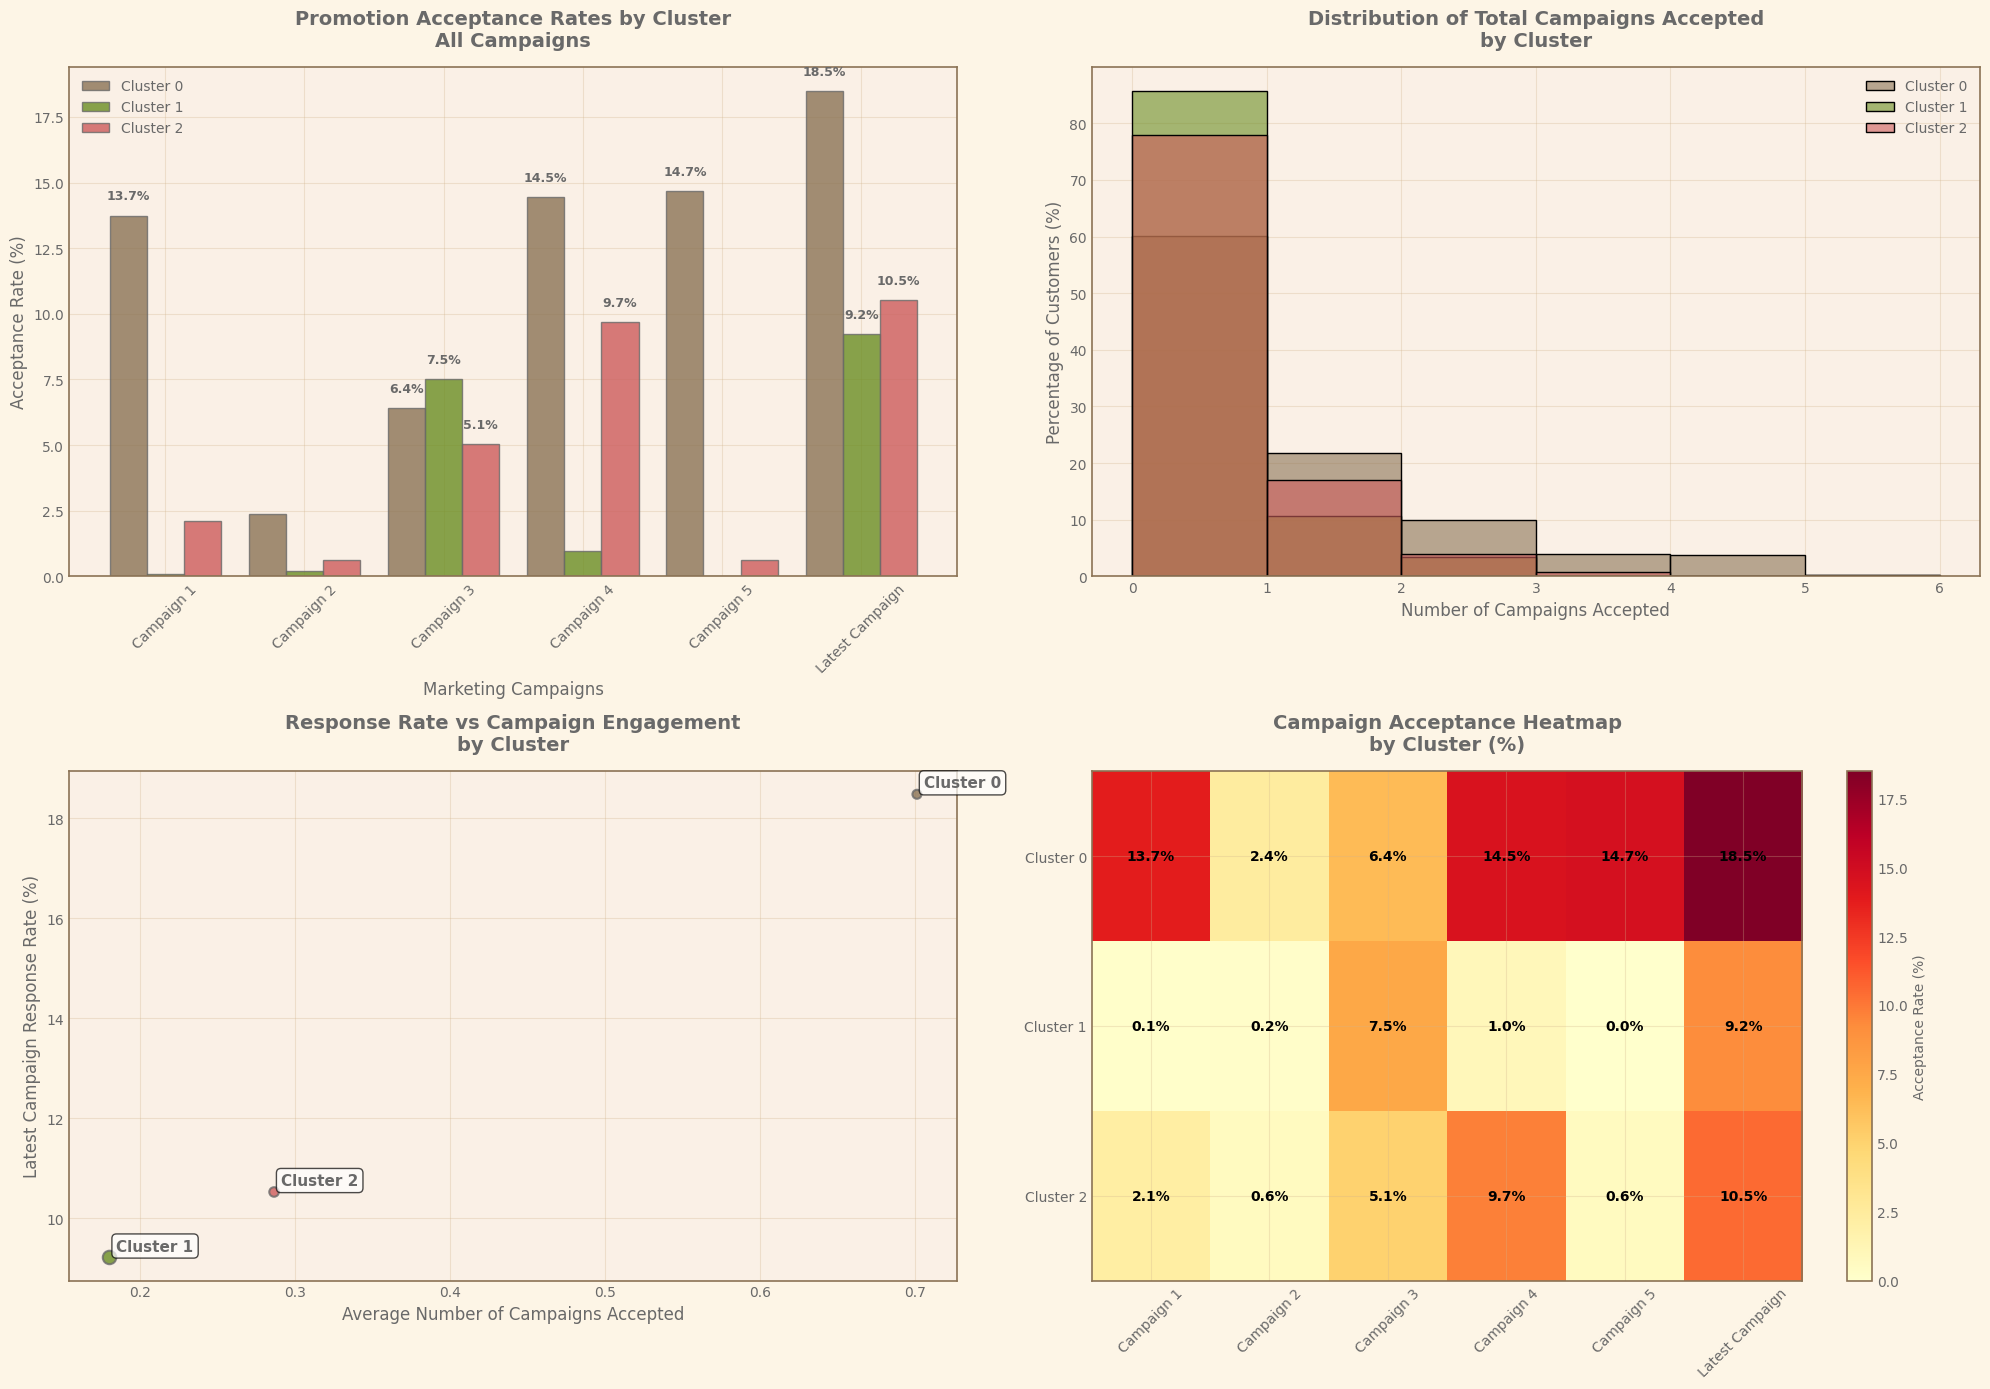


 DETAILED PROMOTION ACCEPTANCE STATISTICS BY CLUSTER

Cluster      Customers  Resp Rate  Avg Camps  Any Camp   Multi Camp Cmp1     Cmp2     Cmp3     Cmp4     Cmp5    
------------------------------------------------------------------------------------------------------------------------
Cluster 0    422        18.5     % 0.70      39.8     % 18.0     % 13.7   % 2.4    % 6.4    % 14.5   % 14.7   %
Cluster 2    944        9.2      % 0.18      14.3     % 3.6      % 0.1    % 0.2    % 7.5    % 1.0    % 0.0    %
Cluster 1    475        10.5     % 0.29      22.1     % 5.1      % 2.1    % 0.6    % 5.1    % 9.7    % 0.6    %

 CAMPAIGN PERFORMANCE ANALYSIS:

Best Performing Campaign by Cluster:

Cluster 0:
  Best: Latest Campaign (18.5% acceptance)
  Worst: Campaign 2 (2.4% acceptance)

Cluster 2:
  Best: Latest Campaign (9.2% acceptance)
  Worst: Campaign 5 (0.0% acceptance)

Cluster 1:
  Best: Latest Campaign (10.5% acceptance)
  Worst: Campaign 2 (0.6% acceptance)

 ENGAGEMENT LEVEL ANALYSI

In [41]:
vintage_colors = set_vintage_theme()

print(" CLUSTER CHARACTERISTICS: PROMOTION ACCEPTANCE ANALYSIS")
print("=" * 65)

clusters = df_clean['Cluster'].unique()
n_clusters = len(clusters)

print(f"Analyzing promotion acceptance across {n_clusters} clusters")
print(f"Total customers: {len(df_clean):,}")
print("\n" + "=" * 50)

# Define promotion/campaign columns
promotion_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
promotion_names = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Latest Campaign']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))


if n_clusters == 2:
    cluster_colors = [vintage_colors['primary'], vintage_colors['accent1']]
    cluster_names = ['Cluster 0', 'Cluster 1']
elif n_clusters == 3:
    cluster_colors = [vintage_colors['primary'], vintage_colors['secondary'], vintage_colors['accent1']]
    cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']
else:
    cluster_colors = [vintage_colors['primary'], vintage_colors['secondary'], 
                     vintage_colors['accent1'], vintage_colors['accent2'],
                     vintage_colors['accent3']][:n_clusters]
    cluster_names = [f'Cluster {i}' for i in range(n_clusters)]

# Overall Promotion Acceptance Rates by Cluster
acceptance_rates = []
for cluster_id in clusters:
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    cluster_rates = []
    for promo_col in promotion_columns:
        rate = cluster_data[promo_col].mean() * 100
        cluster_rates.append(rate)
    acceptance_rates.append(cluster_rates)

x = np.arange(len(promotion_names))
width = 0.8 / n_clusters

for i, cluster_id in enumerate(clusters):
    offset = (i - n_clusters/2 + 0.5) * width
    bars = ax1.bar(x + offset, acceptance_rates[i], width, 
                   label=cluster_names[i], color=cluster_colors[i],
                   alpha=0.8, edgecolor=vintage_colors['dark'], linewidth=1)

    # Add value labels on bars
    for bar, rate in zip(bars, acceptance_rates[i]):
        height = bar.get_height()
        if height > 5:  
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{rate:.1f}%', ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

ax1.set_xlabel('Marketing Campaigns', fontsize=12)
ax1.set_ylabel('Acceptance Rate (%)', fontsize=12)
ax1.set_title('Promotion Acceptance Rates by Cluster\nAll Campaigns', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(promotion_names, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Total Campaigns Accepted Distribution
campaigns_accepted = df_clean[promotion_columns].sum(axis=1)

for i, cluster_id in enumerate(clusters):
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    cluster_campaigns = cluster_data[promotion_columns].sum(axis=1)
    

    sns.histplot(data=cluster_campaigns, bins=range(0, 7), 
                 alpha=0.6, color=cluster_colors[i],
                 label=cluster_names[i], ax=ax2, stat='percent')

ax2.set_xlabel('Number of Campaigns Accepted', fontsize=12)
ax2.set_ylabel('Percentage of Customers (%)', fontsize=12)
ax2.set_title('Distribution of Total Campaigns Accepted\nby Cluster', 
              fontsize=14, fontweight='bold', pad=15)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Response Rate vs Average Campaigns Accepted
response_rates = []
avg_campaigns = []
cluster_sizes = []

for cluster_id in clusters:
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    response_rate = cluster_data['Response'].mean() * 100
    avg_campaign = cluster_data[promotion_columns].sum(axis=1).mean()
    cluster_size = len(cluster_data)
    
    response_rates.append(response_rate)
    avg_campaigns.append(avg_campaign)
    cluster_sizes.append(cluster_size)

scatter = ax3.scatter(avg_campaigns, response_rates, 
                     s=[size/10 for size in cluster_sizes],
                     c=cluster_colors, alpha=0.8,
                     edgecolor=vintage_colors['dark'], linewidth=1.5)

# Add cluster labels to scatter points
for i, (x_val, y_val, cluster_name) in enumerate(zip(avg_campaigns, response_rates, cluster_names)):
    ax3.annotate(cluster_name, (x_val, y_val), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))

ax3.set_xlabel('Average Number of Campaigns Accepted', fontsize=12)
ax3.set_ylabel('Latest Campaign Response Rate (%)', fontsize=12)
ax3.set_title('Response Rate vs Campaign Engagement\nby Cluster', 
              fontsize=14, fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3)

# Campaign Performance Heatmap by Cluster
heatmap_data = []
for cluster_id in clusters:
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    cluster_rates = []
    for promo_col in promotion_columns:
        rate = cluster_data[promo_col].mean() * 100
        cluster_rates.append(rate)
    heatmap_data.append(cluster_rates)

heatmap_data = np.array(heatmap_data)

im = ax4.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')

# Set labels
ax4.set_xticks(range(len(promotion_names)))
ax4.set_xticklabels(promotion_names, rotation=45)
ax4.set_yticks(range(len(cluster_names)))
ax4.set_yticklabels(cluster_names)

# Add text annotations
for i in range(len(cluster_names)):
    for j in range(len(promotion_names)):
        text = ax4.text(j, i, f'{heatmap_data[i, j]:.1f}%',
                       ha="center", va="center", 
                       color="black" if heatmap_data[i, j] < 50 else "white",
                       fontweight='bold', fontsize=10)

ax4.set_title('Campaign Acceptance Heatmap\nby Cluster (%)', 
              fontsize=14, fontweight='bold', pad=15)
plt.colorbar(im, ax=ax4, label='Acceptance Rate (%)')

plt.tight_layout()
plt.show()


print("\n DETAILED PROMOTION ACCEPTANCE STATISTICS BY CLUSTER")
print("=" * 80)

# Calculate comprehensive promotion statistics
promotion_stats = []
for cluster_id in clusters:
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    cluster_stats = {
        'Cluster': cluster_names[cluster_id],
        'Customers': len(cluster_data),
        'Response_Rate': cluster_data['Response'].mean() * 100
    }
    
    # Individual campaign rates
    for promo_col, promo_name in zip(promotion_columns, promotion_names):
        cluster_stats[promo_name] = cluster_data[promo_col].mean() * 100
    
 
    cluster_stats['Avg_Campaigns_Accepted'] = cluster_data[promotion_columns].sum(axis=1).mean()
    cluster_stats['Any_Campaign_Rate'] = (cluster_data[promotion_columns].sum(axis=1) > 0).mean() * 100
    cluster_stats['Multiple_Campaign_Rate'] = (cluster_data[promotion_columns].sum(axis=1) > 1).mean() * 100
    
    promotion_stats.append(cluster_stats)

promotion_df = pd.DataFrame(promotion_stats)

#  campaign acceptance table
print(f"\n{'Cluster':<12} {'Customers':<10} {'Resp Rate':<10} {'Avg Camps':<10} {'Any Camp':<10} {'Multi Camp':<10} {'Cmp1':<8} {'Cmp2':<8} {'Cmp3':<8} {'Cmp4':<8} {'Cmp5':<8}")
print("-" * 120)

for _, row in promotion_df.iterrows():
    print(f"{row['Cluster']:<12} {row['Customers']:<10,} {row['Response_Rate']:<9.1f}% {row['Avg_Campaigns_Accepted']:<9.2f} {row['Any_Campaign_Rate']:<9.1f}% {row['Multiple_Campaign_Rate']:<9.1f}% {row['Campaign 1']:<7.1f}% {row['Campaign 2']:<7.1f}% {row['Campaign 3']:<7.1f}% {row['Campaign 4']:<7.1f}% {row['Campaign 5']:<7.1f}%")


print(f"\n CAMPAIGN PERFORMANCE ANALYSIS:")
print("=" * 50)

# Best performing campaign for each cluster
print("\nBest Performing Campaign by Cluster:")
for _, row in promotion_df.iterrows():
    campaign_rates = {name: row[name] for name in promotion_names}
    best_campaign = max(campaign_rates.items(), key=lambda x: x[1])
    worst_campaign = min(campaign_rates.items(), key=lambda x: x[1])
    
    print(f"\n{row['Cluster']}:")
    print(f"  Best: {best_campaign[0]} ({best_campaign[1]:.1f}% acceptance)")
    print(f"  Worst: {worst_campaign[0]} ({worst_campaign[1]:.1f}% acceptance)")

# Engagement level analysis
print(f"\n ENGAGEMENT LEVEL ANALYSIS:")
print("=" * 45)

engagement_categories = {
    'Non-Engaged': (0, 'No campaigns accepted'),
    'Low Engagement': (1, '1 campaign accepted'),
    'Medium Engagement': (2, '2-3 campaigns accepted'),
    'High Engagement': (4, '4+ campaigns accepted')
}

for _, row in promotion_df.iterrows():
    cluster_id = int(row['Cluster'].split()[-1])
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    total_campaigns = cluster_data[promotion_columns].sum(axis=1)
    
    print(f"\n{row['Cluster']} Engagement Levels:")
    for category, (min_campaigns, description) in engagement_categories.items():
        if min_campaigns == 0:
            count = (total_campaigns == 0).sum()
        elif min_campaigns == 4:
            count = (total_campaigns >= 4).sum()
        else:
            count = (total_campaigns == min_campaigns).sum()
        
        percentage = (count / len(cluster_data)) * 100
        print(f"  {category:<18}: {count:>4} customers ({percentage:5.1f}%)")


print(f"\n STRATEGIC RECOMMENDATIONS:")
print("=" * 45)

# Find best performing clusters for targeting
best_response_cluster = promotion_df.loc[promotion_df['Response_Rate'].idxmax(), 'Cluster']
best_engagement_cluster = promotion_df.loc[promotion_df['Avg_Campaigns_Accepted'].idxmax(), 'Cluster']
most_loyal_cluster = promotion_df.loc[promotion_df['Multiple_Campaign_Rate'].idxmax(), 'Cluster']

print(f"• Primary Target for New Campaigns: {best_response_cluster} (Highest Response Rate)")
print(f"• Focus on Engagement Building: {best_engagement_cluster} (Most Campaigns Accepted)")
print(f"• Loyalty Program Candidates: {most_loyal_cluster} (Highest Multiple Campaign Rate)")

# Campaign-specific recommendations
print(f"\n CAMPAIGN-SPECIFIC STRATEGIES:")
for promo_name in promotion_names[:-1]: 
    best_cluster = promotion_df.loc[promotion_df[promo_name].idxmax(), 'Cluster']
    best_rate = promotion_df.loc[promotion_df[promo_name].idxmax(), promo_name]
    
    print(f"• {promo_name:<12}: Target {best_cluster} ({(best_rate):.1f}% acceptance rate)")

# Calculate marketing efficiency
print(f"\n MARKETING EFFICIENCY METRICS:")
total_campaign_acceptances = df_clean[promotion_columns].sum().sum()
total_marketing_effort = len(df_clean) * len(promotion_columns)
efficiency_rate = (total_campaign_acceptances / total_marketing_effort) * 100

print(f"Overall Campaign Efficiency: {efficiency_rate:.2f}%")
print(f"Total Campaign Acceptances: {total_campaign_acceptances:,}")
print(f"Potential Maximum: {total_marketing_effort:,}")

print(f"\n PROMOTION ACCEPTANCE ANALYSIS COMPLETE!")
print(f"   Analyzed {len(promotion_columns)} campaigns across {n_clusters} clusters")
print(f"   Identified optimal targeting strategies for each customer segment")

 CLUSTER CHARACTERISTICS: SPENDING & AGE ANALYSIS
Analyzing 3 clusters with 1,841 total customers

📊 CLUSTER PROFILES SUMMARY (3 CLUSTERS):

Cluster 0:
  Customers: 422
  Avg Age: 57.6 ± 12.0
  Avg Spending: $1,174 ± $282
  Avg Income: $71,067
  Age-Spending Correlation: -0.031
  Response Rate: 18.5%

Cluster 1:
  Customers: 944
  Avg Age: 52.9 ± 10.6
  Avg Spending: $81 ± $66
  Avg Income: $33,178
  Age-Spending Correlation: -0.032
  Response Rate: 9.2%

Cluster 2:
  Customers: 475
  Avg Age: 60.4 ± 10.6
  Avg Spending: $503 ± $197
  Avg Income: $54,703
  Age-Spending Correlation: -0.048
  Response Rate: 10.5%

 COMPARATIVE INSIGHTS FOR 3 CLUSTERS:
• Highest Spending: Cluster 0 ($1,174)
• Lowest Spending: Cluster 2 ($81)
• Spending Range: $1,093
• Youngest Segment: Cluster 2 (52.9 years)
• Oldest Segment: Cluster 1 (60.4 years)

 DYNAMIC CLUSTER ANALYSIS COMPLETE!
   Analyzed 3 clusters with adaptive visualizations
   Total customers: 1,841


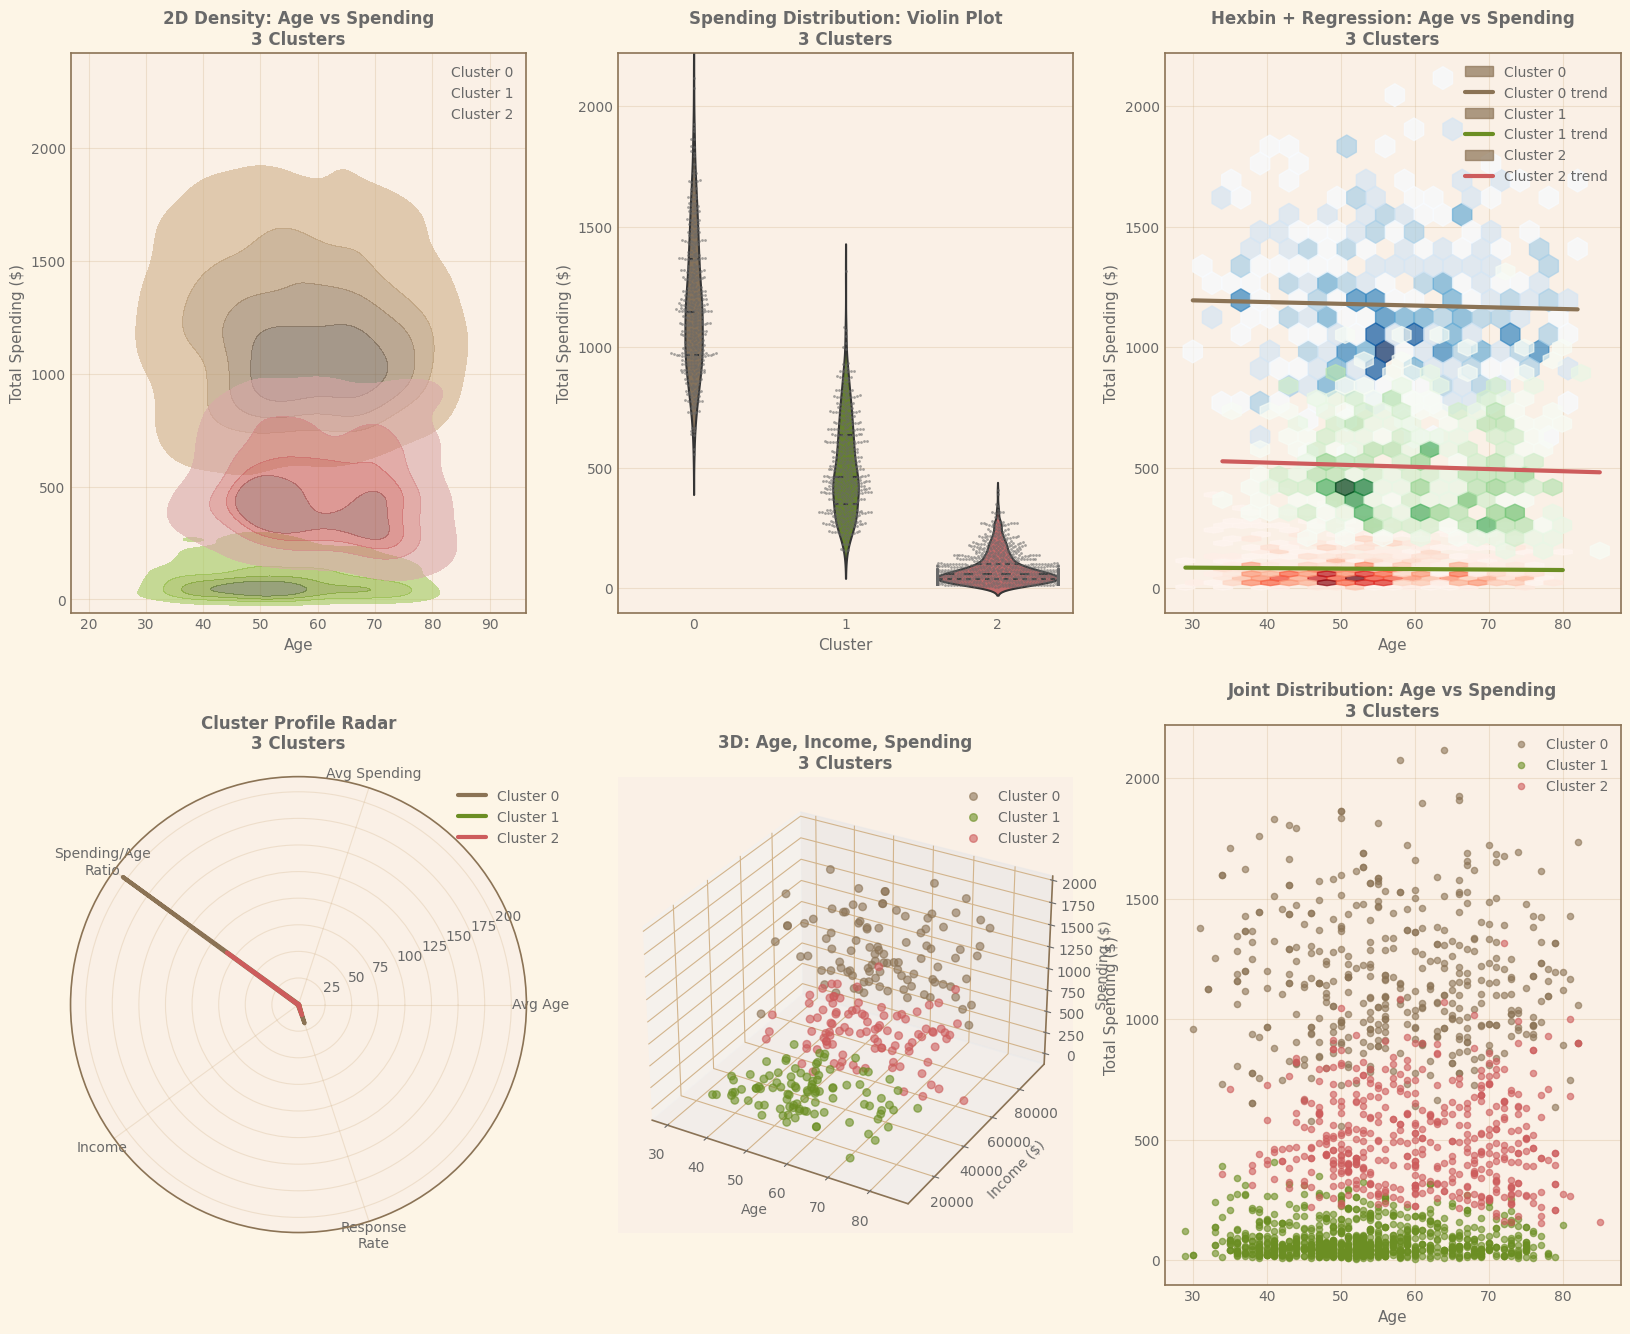

In [45]:
def analyze_cluster_characteristics_dynamic():
    """
    Dynamic cluster characteristics analysis based on previously chosen number of clusters
    """
    vintage_colors = set_vintage_theme()

    print(" CLUSTER CHARACTERISTICS: SPENDING & AGE ANALYSIS")
    print("=" * 55)

    # Get dynamic cluster information
    n_clusters = len(df_clean['Cluster'].unique())

    color_palette = [vintage_colors['primary'], vintage_colors['secondary'], 
                     vintage_colors['accent1'], vintage_colors['accent2'],
                     vintage_colors['accent3'], vintage_colors['accent4'],
                     vintage_colors['neutral'], vintage_colors['light']]
    cluster_colors = color_palette[:n_clusters]
    cluster_names = [f'Cluster {i}' for i in range(n_clusters)]

    print(f"Analyzing {n_clusters} clusters with {len(df_clean):,} total customers")

    # Create complex multi-panel visualization
    fig = plt.figure(figsize=(20, 16))
    
    # Dynamic grid layout based on number of clusters
    if n_clusters <= 3:
        gs = fig.add_gridspec(2, 3)
    else:
        gs = fig.add_gridspec(3, 3)

    # 2D Density Plot with Marginal Distributions
    ax1 = fig.add_subplot(gs[0, 0])
    for i, cluster_id in enumerate(df_clean['Cluster'].unique()):
        cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
        sns.kdeplot(data=cluster_data, x='Age', y='Total_Spending', 
                    color=cluster_colors[i], label=cluster_names[i], 
                    alpha=0.6, fill=True, ax=ax1, levels=5)
    ax1.set_xlabel('Age', fontsize=11)
    ax1.set_ylabel('Total Spending ($)', fontsize=11)
    ax1.set_title(f'2D Density: Age vs Spending\n{n_clusters} Clusters', fontweight='bold')
    ax1.legend()

    #Violin + Swarm Plot
    ax2 = fig.add_subplot(gs[0, 1])
    sns.violinplot(data=df_clean, x='Cluster', y='Total_Spending', 
                   palette=cluster_colors, inner='quartile', ax=ax2)
    if n_clusters <= 4:  # Only show swarm plot for smaller clusters (performance)
        sns.swarmplot(data=df_clean, x='Cluster', y='Total_Spending', 
                      color=vintage_colors['dark'], size=2, alpha=0.6, ax=ax2)
    ax2.set_xlabel('Cluster', fontsize=11)
    ax2.set_ylabel('Total Spending ($)', fontsize=11)
    ax2.set_title(f'Spending Distribution: Violin Plot\n{n_clusters} Clusters', fontweight='bold')

    #Hexbin Plot with Regression
    ax3 = fig.add_subplot(gs[0, 2])
    cmaps = ['Blues', 'Reds', 'Greens', 'Purples', 'Oranges', 'Greys', 'YlOrBr', 'BuPu']
    
    for i, cluster_id in enumerate(df_clean['Cluster'].unique()):
        cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
        hexbin = ax3.hexbin(cluster_data['Age'], cluster_data['Total_Spending'], 
                           gridsize=20, cmap=cmaps[i % len(cmaps)], 
                           alpha=0.7, mincnt=1, label=cluster_names[i])
        
        # Add regression line
        z = np.polyfit(cluster_data['Age'], cluster_data['Total_Spending'], 1)
        p = np.poly1d(z)
        age_range = np.linspace(cluster_data['Age'].min(), cluster_data['Age'].max(), 100)
        ax3.plot(age_range, p(age_range), color=cluster_colors[i], 
                linewidth=3, label=f'{cluster_names[i]} trend')
    
    ax3.set_xlabel('Age', fontsize=11)
    ax3.set_ylabel('Total Spending ($)', fontsize=11)
    ax3.set_title(f'Hexbin + Regression: Age vs Spending\n{n_clusters} Clusters', fontweight='bold')
    ax3.legend()

    #Radar Chart for Cluster Profiles (only for 3-6 clusters)
    if 3 <= n_clusters <= 6:
        ax4 = fig.add_subplot(gs[1, 0], polar=True)
        categories = ['Avg Age', 'Avg Spending', 'Spending/Age\nRatio', 'Income', 'Response\nRate']
        N = len(categories)

        # Normalize values for radar chart
        stats_to_plot = []
        for cluster_id in df_clean['Cluster'].unique():
            cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
            profile = [
                cluster_data['Age'].mean() / 100,
                cluster_data['Total_Spending'].mean() / 2000,
                (cluster_data['Total_Spending'].mean() / cluster_data['Age'].mean()) * 10,
                cluster_data['Income'].mean() / 100000,
                cluster_data['Response'].mean() * 100
            ]
            stats_to_plot.append(profile)

        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]

        for i, profile in enumerate(stats_to_plot):
            profile += profile[:1]
            ax4.plot(angles, profile, color=cluster_colors[i], linewidth=3, label=cluster_names[i])
            ax4.fill(angles, profile, color=cluster_colors[i], alpha=0.25)

        ax4.set_xticks(angles[:-1])
        ax4.set_xticklabels(categories)
        ax4.set_title(f'Cluster Profile Radar\n{n_clusters} Clusters', fontweight='bold', pad=20)
        ax4.legend(bbox_to_anchor=(1.1, 1))
    else:
        # Alternative: Box plot for many clusters
        ax4 = fig.add_subplot(gs[1, 0])
        sns.boxplot(data=df_clean, x='Cluster', y='Age', palette=cluster_colors, ax=ax4)
        ax4.set_xlabel('Cluster', fontsize=11)
        ax4.set_ylabel('Age', fontsize=11)
        ax4.set_title(f'Age Distribution by Cluster\n{n_clusters} Clusters', fontweight='bold')

    #3D Scatter Plot
    ax5 = fig.add_subplot(gs[1, 1], projection='3d')
    for i, cluster_id in enumerate(df_clean['Cluster'].unique()):
        cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
        # Sample data for better 3D visualization performance
        if len(cluster_data) > 100:
            cluster_data = cluster_data.sample(100, random_state=42)
        ax5.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Total_Spending'],
                   color=cluster_colors[i], label=cluster_names[i], alpha=0.6, s=30)
    ax5.set_xlabel('Age')
    ax5.set_ylabel('Income ($)')
    ax5.set_zlabel('Spending ($)')
    ax5.set_title(f'3D: Age, Income, Spending\n{n_clusters} Clusters', fontweight='bold')
    ax5.legend()

    #Joint Distribution (for smaller clusters)
    if n_clusters <= 4:
        ax6 = fig.add_subplot(gs[1, 2])
        for i, cluster_id in enumerate(df_clean['Cluster'].unique()):
            cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
            ax6.scatter(cluster_data['Age'], cluster_data['Total_Spending'],
                       color=cluster_colors[i], label=cluster_names[i], alpha=0.6, s=20)
        ax6.set_xlabel('Age', fontsize=11)
        ax6.set_ylabel('Total Spending ($)', fontsize=11)
        ax6.set_title(f'Joint Distribution: Age vs Spending\n{n_clusters} Clusters', fontweight='bold')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
    else:
        # Alternative: Response Rate by Cluster
        ax6 = fig.add_subplot(gs[1, 2])
        response_rates = df_clean.groupby('Cluster')['Response'].mean() * 100
        bars = ax6.bar(range(len(response_rates)), response_rates.values, color=cluster_colors)
        ax6.set_xlabel('Cluster', fontsize=11)
        ax6.set_ylabel('Response Rate (%)', fontsize=11)
        ax6.set_title(f'Response Rates by Cluster\n{n_clusters} Clusters', fontweight='bold')
        ax6.set_xticks(range(len(response_rates)))
        ax6.set_xticklabels([f'Cluster {i}' for i in response_rates.index])
        
        # Add value labels
        for bar, rate in zip(bars, response_rates.values):
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')


    print(f"\n📊 CLUSTER PROFILES SUMMARY ({n_clusters} CLUSTERS):")
    print("=" * 60)
    
    for i, cluster_id in enumerate(df_clean['Cluster'].unique()):
        cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
        age_spending_corr = cluster_data['Age'].corr(cluster_data['Total_Spending'])
        
        print(f"\n{cluster_names[i]}:")
        print(f"  Customers: {len(cluster_data):,}")
        print(f"  Avg Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f}")
        print(f"  Avg Spending: ${cluster_data['Total_Spending'].mean():,.0f} ± ${cluster_data['Total_Spending'].std():,.0f}")
        print(f"  Avg Income: ${cluster_data['Income'].mean():,.0f}")
        print(f"  Age-Spending Correlation: {age_spending_corr:.3f}")
        print(f"  Response Rate: {cluster_data['Response'].mean()*100:.1f}%")

   
    print(f"\n COMPARATIVE INSIGHTS FOR {n_clusters} CLUSTERS:")
    print("=" * 55)
    
    # Find clusters with highest and lowest spending
    spending_by_cluster = df_clean.groupby('Cluster')['Total_Spending'].mean()
    highest_spending_cluster = spending_by_cluster.idxmax()
    lowest_spending_cluster = spending_by_cluster.idxmin()
    
    print(f"• Highest Spending: Cluster {highest_spending_cluster} (${spending_by_cluster.max():,.0f})")
    print(f"• Lowest Spending: Cluster {lowest_spending_cluster} (${spending_by_cluster.min():,.0f})")
    print(f"• Spending Range: ${spending_by_cluster.max() - spending_by_cluster.min():,.0f}")


    age_by_cluster = df_clean.groupby('Cluster')['Age'].mean()
    youngest_cluster = age_by_cluster.idxmin()
    oldest_cluster = age_by_cluster.idxmax()
    
    print(f"• Youngest Segment: Cluster {youngest_cluster} ({age_by_cluster.min():.1f} years)")
    print(f"• Oldest Segment: Cluster {oldest_cluster} ({age_by_cluster.max():.1f} years)")

    print(f"\n DYNAMIC CLUSTER ANALYSIS COMPLETE!")
    print(f"   Analyzed {n_clusters} clusters with adaptive visualizations")
    print(f"   Total customers: {len(df_clean):,}")

# Run the dynamic analysis
analyze_cluster_characteristics_dynamic()